In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [4]:
import numpy as np ## Numerical python for matrix operations
from sklearn.model_selection import KFold, train_test_split ## Creating cross validation sets
from sklearn import metrics ## For loss functions

## Libraries for Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
import xgboost as xgb 
import lightgbm as lgb 


C:\Users\Architect_shwet\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.metrics import accuracy_score, classification_report

In [6]:
# Load spreadsheet: xl
xl = pd.ExcelFile('raw_data_1.xlsx')

# Print sheet names
print(xl.sheet_names)

['Squirrel SQL Export']


In [7]:
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('Squirrel SQL Export')

# Print the head of the DataFrame df1
df1.head()

,combined_case_number,filing_year,court_name,before_honourable_judges,date_filed,current_status,nature_of_disposal,decision_date
0,CRI. CASE-6764-2014,2014.0,Chief Judicial Magistrate,Addl. Chief Judicial Magistrate Court No. 2,NaN,Disposed,Contested--DECIDED,2014-12-06
1,CRI. CASE-6763-2014,2014.0,Chief Judicial Magistrate,Addl. Chief Judicial Magistrate Court No. 2,NaN,Disposed,Contested--DECIDED,2014-12-06
2,CRI. CASE-6756-2014,2014.0,Chief Judicial Magistrate,Addl. Chief Judicial Magistrate Court No. 2,NaN,Disposed,Contested--DECIDED,2014-12-06
3,CRI. CASE-6755-2014,2014.0,Chief Judicial Magistrate,Addl. Chief Judicial Magistrate Court No. 2,NaN,Disposed,Contested--DECIDED,2014-12-06
4,CRI. CASE-6752-2014,2014.0,Chief Judicial Magistrate,Addl. Chief Judicial Magistrate Court No. 2,NaN,Disposed,Contested--DECIDED,2014-12-06


In [8]:
df1.dtypes

combined_case_number                object
filing_year                        float64
court_name                          object
before_honourable_judges            object
date_filed                          object
current_status                      object
nature_of_disposal                  object
decision_date               datetime64[ns]
dtype: object

In [9]:
df1.get_dtype_counts()

datetime64[ns]    1
float64           1
object            6
dtype: int64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898236 entries, 0 to 898235
Data columns (total 8 columns):
combined_case_number        898236 non-null object
filing_year                 886352 non-null float64
court_name                  898236 non-null object
before_honourable_judges    576897 non-null object
date_filed                  642470 non-null object
current_status              898236 non-null object
nature_of_disposal          897298 non-null object
decision_date               897853 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 54.8+ MB


In [11]:
df1.isnull().sum(axis = 0)

combined_case_number             0
filing_year                  11884
court_name                       0
before_honourable_judges    321339
date_filed                  255766
current_status                   0
nature_of_disposal             938
decision_date                  383
dtype: int64

In [12]:
missing_values = pd.DataFrame()
missing_values = df1.isnull().sum(axis = 0).reset_index()
missing_values.columns = ['variable', 'missing_count']
missing_values

,variable,missing_count
0,combined_case_number,0
1,filing_year,11884
2,court_name,0
3,before_honourable_judges,321339
4,date_filed,255766
5,current_status,0
6,nature_of_disposal,938
7,decision_date,383


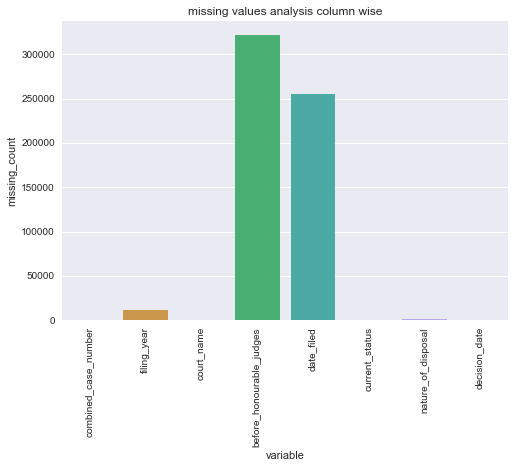

In [13]:
ax = sns.barplot( x = 'variable', y = 'missing_count', data = missing_values)
plt.xticks(rotation = 90)
plt.ylabel('missing_count')
plt.title('missing values analysis column wise')

In [14]:
df1.combined_case_number.value_counts()

C.C. - CRIMINAL CASES--                                   5186
Criminal Misc--                                           1907
Civil Suit--                                              1016
Civil M.A.--                                               767
Crl.Misc. - CRIMINAL MISC.CASES--                          631
138 Ni Act - 138 Negotiable Instrument Act--               426
Lower Court Trial Ipc--                                    299
Misc.civil--                                               192
Final Report--                                             174
Criminal Case--                                            162
Complaint Cases Lct - COMPLAINT CASES Lower Court Tr--     130
Maintenance--                                              118
Arms Act--                                                  76
Misc Criminal Case--                                        76
Domestice Violence Act--                                    75
Complaint St Ipc--                                     

In [15]:
len(df1['combined_case_number'].unique())

715647

In [16]:
df1.filing_year.value_counts()

2014.0    94603
2012.0    82031
2011.0    72813
2013.0    70033
2010.0    59131
2009.0    58253
2006.0    56299
2005.0    56194
2008.0    52242
2007.0    50619
2004.0    45890
2003.0    38020
2002.0    28158
2001.0    25658
2015.0    19652
2016.0    17534
2000.0    13742
2017.0    12468
1999.0     7468
1998.0     6459
1997.0     4470
1996.0     2674
1991.0     1778
1995.0     1769
1990.0     1676
1993.0     1624
1994.0     1537
1992.0     1026
1989.0      639
1988.0      345
1987.0      322
1986.0      296
1985.0      208
1984.0      129
1983.0      121
1982.0      107
1981.0       68
1980.0       62
1976.0       57
1979.0       32
1977.0       25
1978.0       19
1974.0       19
1969.0       12
1973.0       12
1975.0       12
1972.0        8
1970.0        8
1971.0        5
1967.0        4
1966.0        4
1968.0        3
1964.0        3
1958.0        3
1965.0        2
1962.0        2
1953.0        2
1947.0        2
Name: filing_year, dtype: int64

In [17]:
len(df1['filing_year'].unique())

59

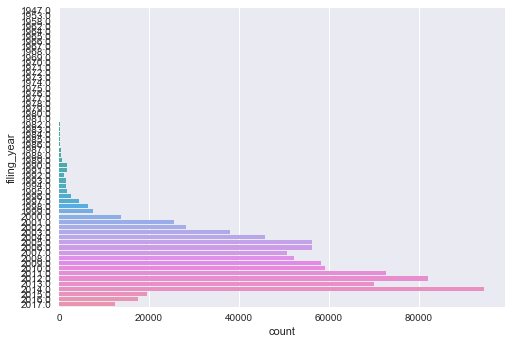

In [18]:
sns.countplot(y = 'filing_year', data = df1)

In [19]:
df1_filing_year = pd.DataFrame()
df1_filing_year = df1.filing_year.value_counts().reset_index()
df1_filing_year.columns = ["filing_year", "count"]
df1_filing_year_top10 = df1_filing_year.head(10)
df1_filing_year_last10 = df1_filing_year.tail(10)
df1_filing_year

,filing_year,count
0,2014.0,94603
1,2012.0,82031
2,2011.0,72813
3,2013.0,70033
4,2010.0,59131
5,2009.0,58253
6,2006.0,56299
7,2005.0,56194
8,2008.0,52242
9,2007.0,50619


# Top 10 and Bottom 10 frequent filing years 

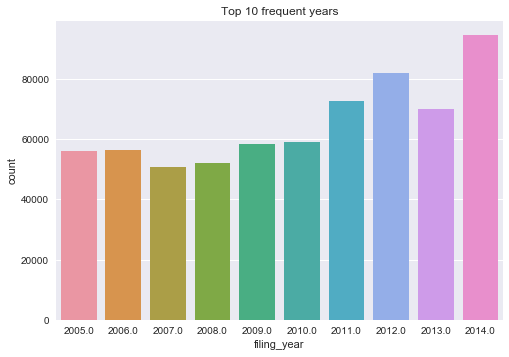

In [20]:
ax = sns.barplot(x="filing_year", y="count", data=df1_filing_year_top10)
plt.ylabel('count')
plt.title("Top 10 frequent years")

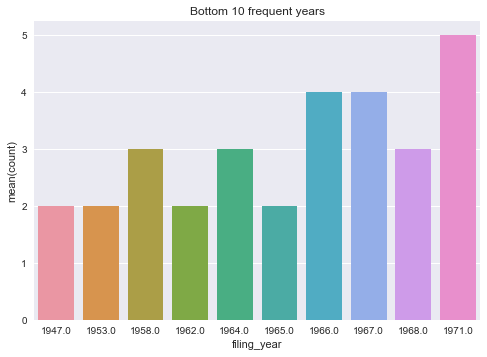

In [21]:
ax = sns.barplot(x="filing_year", y="count", data=df1_filing_year_last10)
plt.title("Bottom 10 frequent years")

In [22]:
df1.court_name.value_counts()

Chief Judicial Magistrate                                            92867
Chief Judicial Magistrate , Jalna                                    42848
ADDL. CITY CIVIL and SESSIONS JUDGES, MAYO HALL AND FTC, MAYOHALL    42296
District and Session Judge                                           37267
Civil Court Senior Division , Ahmednagar                             31506
Civil Judge Junior Division Kelapur                                  29724
District and Sessions Judge, East, KKD                               28747
Civil Judge Junior Division                                          27027
Prl. Civil Judge (Sr. Dn.) and CJM                                   26614
Civil Court Junior Division , Kopergaon                              26344
Dist. and Sessions Judge                                             25320
Chief Judicial Magistarte , Yavatmal                                 25311
ADDL. SMALL CAUSES COURT JUDGES, MAYO HALL                           23417
Civil Judge Junior Divisi

In [23]:
len(df1['court_name'].unique())

96

In [24]:
df1_court_name = pd.DataFrame()
df1_court_name = df1.court_name.value_counts().reset_index()
df1_court_name.columns = ["court_name", "count"]
df1_court_name_top15 = df1_court_name.head(15)
df1_court_name_last10 = df1_court_name.tail(10)
df1_court_name

,court_name,count
0,Chief Judicial Magistrate,92867
1,"Chief Judicial Magistrate , Jalna",42848
2,"ADDL. CITY CIVIL and SESSIONS JUDGES, MAYO HAL...",42296
3,District and Session Judge,37267
4,"Civil Court Senior Division , Ahmednagar",31506
5,Civil Judge Junior Division Kelapur,29724
6,"District and Sessions Judge, East, KKD",28747
7,Civil Judge Junior Division,27027
8,Prl. Civil Judge (Sr. Dn.) and CJM,26614
9,"Civil Court Junior Division , Kopergaon",26344


# Top 15 and last 10 frequent court_names

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

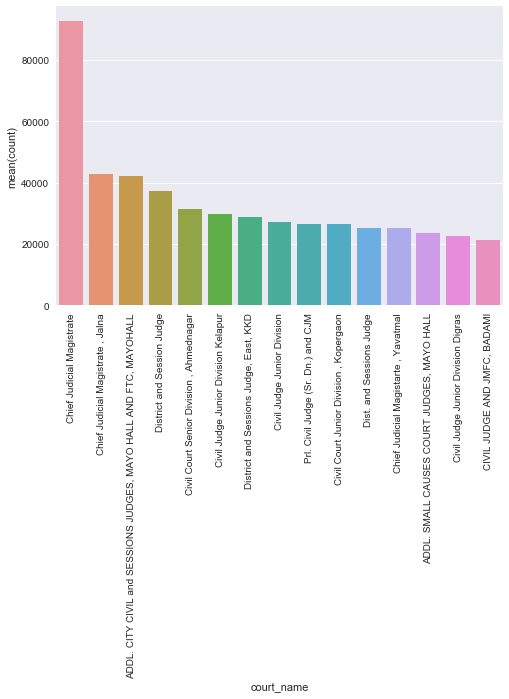

In [25]:
ax = sns.barplot(x="court_name", y="count", data=df1_court_name_top15)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

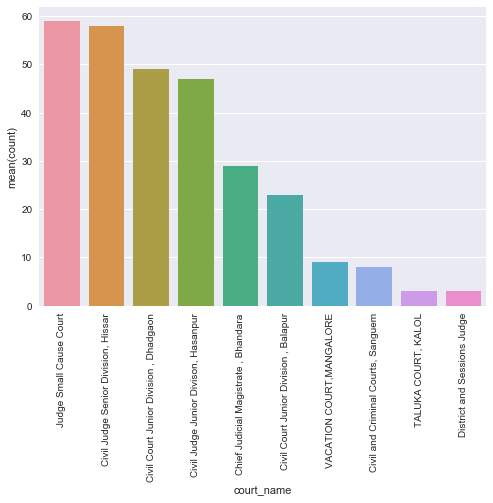

In [26]:
ax = sns.barplot(x="court_name", y="count", data=df1_court_name_last10)
plt.xticks(rotation = 90)

# Looking at the top frequent years 2014, 2012, 2011, 2013 and seeing how top 15 frequent and last 10 frequent court names are distributed among this

# Frequent year 2014- court_name

In [27]:
df1_filing_year_2014 = df1.loc[df1['filing_year'] == 2014]

In [28]:
df1_filing_year_2014.court_name.value_counts()

Chief Judicial Magistrate                                            13750
District and Session Judge                                            8051
Civil Judge Junior Division                                           3441
Family Court Firozabad                                                3111
PRL. CIVIL JUDGE AND JMFC, HUMNABAD                                   3013
Civil Judge Senior Division                                           2740
Prl. Civil Judge (Sr. Dn.) and CJM                                    2569
METROPOLITAN MAGISTRATE (TRAFFIC COURT III)                           2547
CIVIL JUDGE and JMFC, SAKLESHPUR                                      2503
ADDL. CITY CIVIL and SESSIONS JUDGES, MAYO HALL AND FTC, MAYOHALL     2478
District and Session Court , Ahmednagar                               2460
PRL CIVIL JUDGE AND JMFC, SINDHANUR                                   2314
Judicial First Class Magistrate Court II, Hosdurg                     2300
METROPOLITAN MAGISTRATE (

In [29]:
df1_court_name_2014 = pd.DataFrame()
df1_court_name_2014 = df1_filing_year_2014.court_name.value_counts().reset_index()
df1_court_name_2014.columns = ["court_name", "count"]
df1_court_name_2014_top15 = df1_court_name_2014.head(15)
df1_court_name_2014_last10 = df1_court_name_2014.tail(10)
df1_court_name_2014

,court_name,count
0,Chief Judicial Magistrate,13750
1,District and Session Judge,8051
2,Civil Judge Junior Division,3441
3,Family Court Firozabad,3111
4,"PRL. CIVIL JUDGE AND JMFC, HUMNABAD",3013
5,Civil Judge Senior Division,2740
6,Prl. Civil Judge (Sr. Dn.) and CJM,2569
7,METROPOLITAN MAGISTRATE (TRAFFIC COURT III),2547
8,"CIVIL JUDGE and JMFC, SAKLESHPUR",2503
9,"ADDL. CITY CIVIL and SESSIONS JUDGES, MAYO HAL...",2478


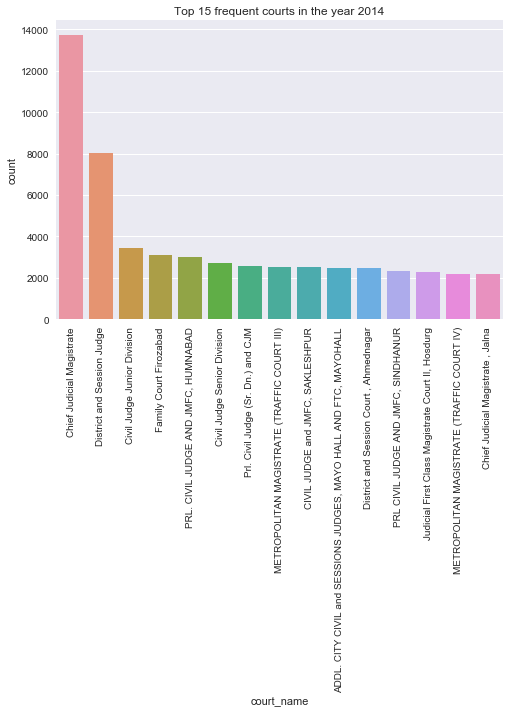

In [30]:
ax = sns.barplot(x="court_name", y="count", data=df1_court_name_2014_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Top 15 frequent courts in the year 2014')

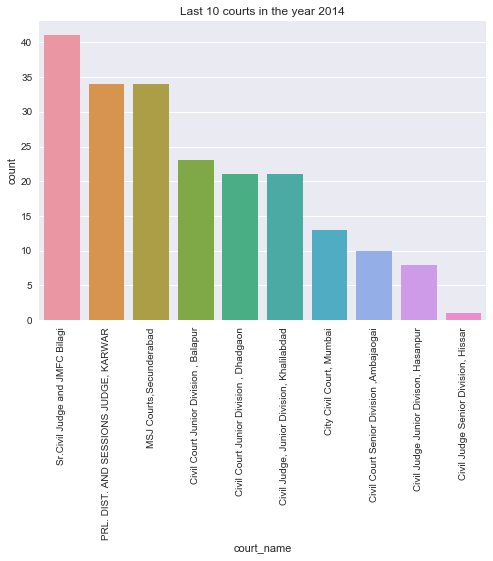

In [31]:
ax = sns.barplot(x="court_name", y="count", data=df1_court_name_2014_last10)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Last 10 courts in the year 2014')

# Frequent year 2012 - court_name

In [32]:
df1_filing_year_2012 = df1.loc[df1['filing_year'] == 2012]

In [33]:
df1_court_name_2012 = pd.DataFrame()
df1_court_name_2012 = df1_filing_year_2012.court_name.value_counts().reset_index()
df1_court_name_2012.columns = ["court_name", "count"]
df1_court_name_2012_top15 = df1_court_name_2012.head(15)
df1_court_name_2012_last10 = df1_court_name_2012.tail(10)
df1_court_name_2012

,court_name,count
0,Civil Judge Junior Division,8774
1,Chief Judicial Magistrate,6737
2,District and Session Judge,5770
3,"ADDL. CITY CIVIL and SESSIONS JUDGES, MAYO HAL...",3485
4,"ADDL. SMALL CAUSES COURT JUDGES, MAYO HALL",3102
5,Civil Judge Senior Division,2771
6,"Jr. Civil Courts, Hyderabad",2745
7,"Chief Judicial Magistrate , Jalna",2720
8,Civil Judge Junior Division Kelapur,2624
9,"District and Sessions Judge, East, KKD",2597


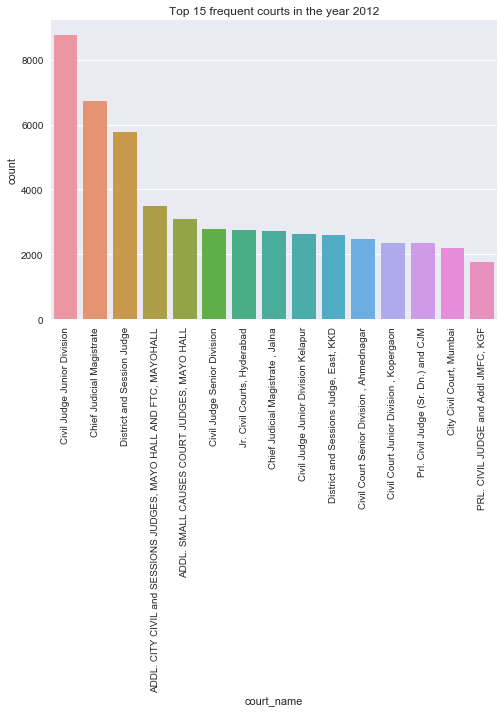

In [34]:
ax = sns.barplot(x="court_name", y="count", data=df1_court_name_2012_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Top 15 frequent courts in the year 2012')

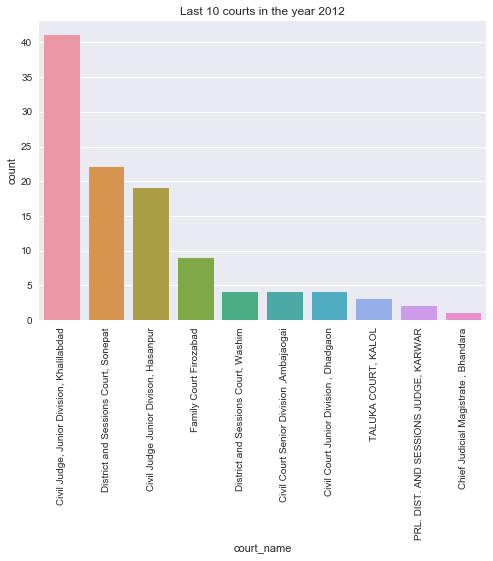

In [35]:
ax = sns.barplot(x="court_name", y="count", data=df1_court_name_2012_last10)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Last 10 courts in the year 2012')

# Frequent year 2011- court_name

In [36]:
df1_filing_year_2011 = df1.loc[df1['filing_year'] == 2011]

In [37]:
df1_court_name_2011 = pd.DataFrame()
df1_court_name_2011 = df1_filing_year_2011.court_name.value_counts().reset_index()
df1_court_name_2011.columns = ["court_name", "count"]
df1_court_name_2011_top15 = df1_court_name_2011.head(15)
df1_court_name_2011_last10 = df1_court_name_2011.tail(10)
df1_court_name_2011

,court_name,count
0,Chief Judicial Magistrate,6874
1,District and Session Judge,5227
2,"ADDL. SMALL CAUSES COURT JUDGES, MAYO HALL",4864
3,"ADDL. CITY CIVIL and SESSIONS JUDGES, MAYO HAL...",3743
4,"District and Sessions Judge, East, KKD",3339
5,"Jr. Civil Courts, Hyderabad",3004
6,Civil Judge Senior Division,2920
7,"Chief Judicial Magistrate , Jalna",2740
8,Civil Judge Junior Division Kelapur,2569
9,"Civil Court Junior Division , Kopergaon",2463


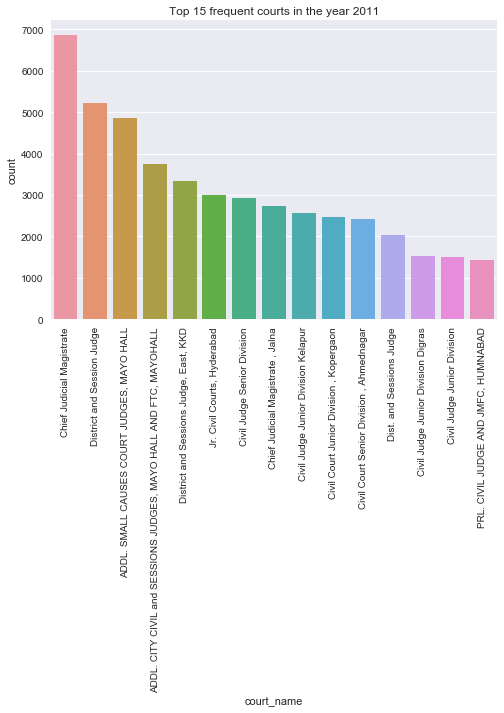

In [38]:
ax = sns.barplot(x="court_name", y="count", data=df1_court_name_2011_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Top 15 frequent courts in the year 2011')

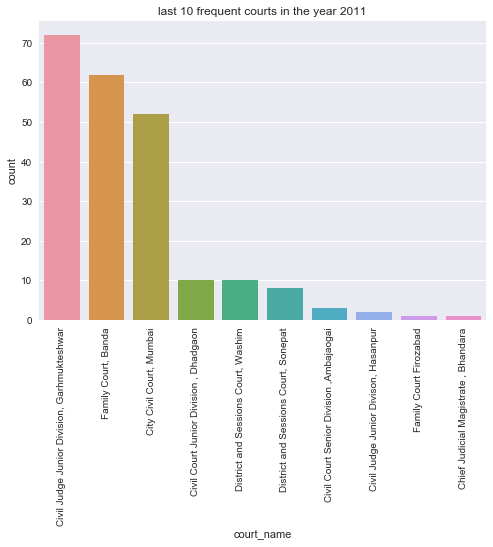

In [39]:
ax = sns.barplot(x="court_name", y="count", data=df1_court_name_2011_last10)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('last 10 frequent courts in the year 2011')

# Frequent year 2013- court_name

In [40]:
df1_filing_year_2013 = df1.loc[df1['filing_year'] == 2013]

In [41]:
df1_court_name_2013 = pd.DataFrame()
df1_court_name_2013 = df1_filing_year_2013.court_name.value_counts().reset_index()
df1_court_name_2013.columns = ["court_name", "count"]
df1_court_name_2013_top15 = df1_court_name_2013.head(15)
df1_court_name_2013_last10 = df1_court_name_2013.tail(10)
df1_court_name_2013

,court_name,count
0,Chief Judicial Magistrate,6984
1,District and Session Judge,5093
2,"ADDL. CITY CIVIL and SESSIONS JUDGES, MAYO HAL...",3029
3,"PRL. CIVIL JUDGE and JMFC, Gangawati",2961
4,"PRL CIVIL JUDGE AND JMFC, SINDHANUR",2562
5,"Chief Judicial Magistrate , Jalna",2399
6,"Civil Court Junior Division , Kopergaon",2256
7,"District and Sessions Judge, East, KKD",2175
8,"PRL. CIVIL JUDGE AND JMFC, HUMNABAD",2087
9,"PRL. CIVIL JUDGE and Addl JMFC, KGF",1937


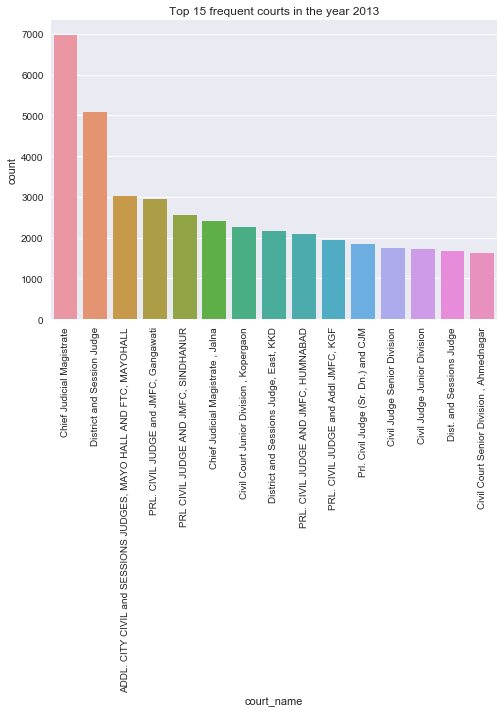

In [42]:
ax = sns.barplot(x="court_name", y="count", data=df1_court_name_2013_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Top 15 frequent courts in the year 2013')

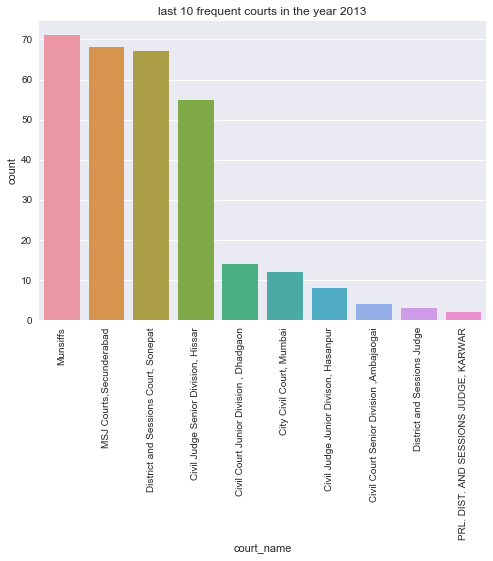

In [43]:
ax = sns.barplot(x="court_name", y="count", data=df1_court_name_2013_last10)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('last 10 frequent courts in the year 2013')

# Frequent year 2010 and court_name

In [44]:
df1_filing_year_2010 = df1.loc[df1['filing_year'] == 2010]

In [45]:
df1_court_name_2010 = pd.DataFrame()
df1_court_name_2010 = df1_filing_year_2010.court_name.value_counts().reset_index()
df1_court_name_2010.columns = ["court_name", "count"]
df1_court_name_2010_top15 = df1_court_name_2010.head(15)
df1_court_name_2010_last10 = df1_court_name_2010.tail(10)
df1_court_name_2010

,court_name,count
0,Chief Judicial Magistrate,4401
1,"ADDL. CITY CIVIL and SESSIONS JUDGES, MAYO HAL...",3935
2,"District and Sessions Judge, East, KKD",3555
3,"ADDL. SMALL CAUSES COURT JUDGES, MAYO HALL",3347
4,"Chief Judicial Magistrate , Jalna",2785
5,"Civil Court Junior Division , Kopergaon",2444
6,District and Session Judge,2299
7,Dist. and Sessions Judge,2201
8,"Civil Court Senior Division , Ahmednagar",2170
9,Civil Judge Junior Division Kelapur,1892


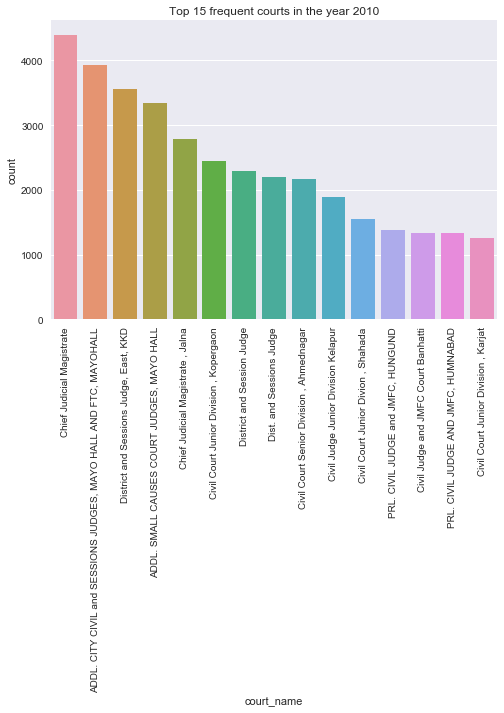

In [46]:
ax = sns.barplot(x="court_name", y="count", data=df1_court_name_2010_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Top 15 frequent courts in the year 2010')

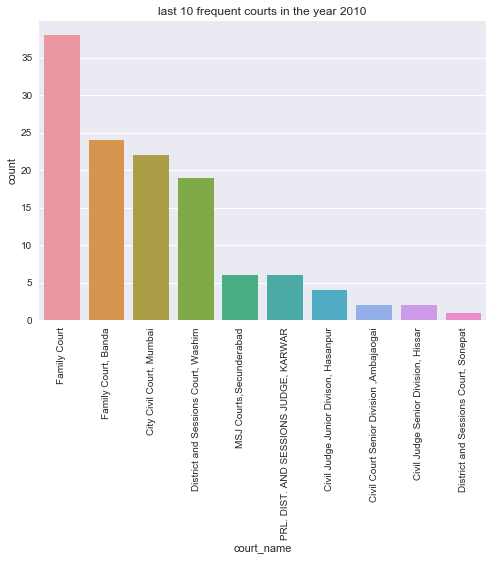

In [47]:
ax = sns.barplot(x="court_name", y="count", data=df1_court_name_2010_last10)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('last 10 frequent courts in the year 2010')

# Now with respect to top frequent court_name, I will look at the distribution of filing year

# court_name chief judicial magistrate- filing year

In [48]:
court_name_chief_jud_magistrate = df1.loc[df1['court_name']  == 'Chief Judicial Magistrate']

In [49]:
df1_filing_year_chief_jud_magistrate = pd.DataFrame()
df1_filing_year_chief_jud_magistrate = court_name_chief_jud_magistrate.filing_year.value_counts().reset_index()
df1_filing_year_chief_jud_magistrate.columns = ["filing_year", "count"]
df1_filing_year_chief_jud_magistrate_top15 = df1_filing_year_chief_jud_magistrate.head(15)
df1_filing_year_chief_jud_magistrate_last10 = df1_filing_year_chief_jud_magistrate.tail(10)
df1_filing_year_chief_jud_magistrate

,filing_year,count
0,2014.0,13750
1,2015.0,10990
2,2017.0,10729
3,2016.0,9589
4,2013.0,6984
5,2011.0,6874
6,2012.0,6737
7,2010.0,4401
8,2009.0,3751
9,2008.0,2934


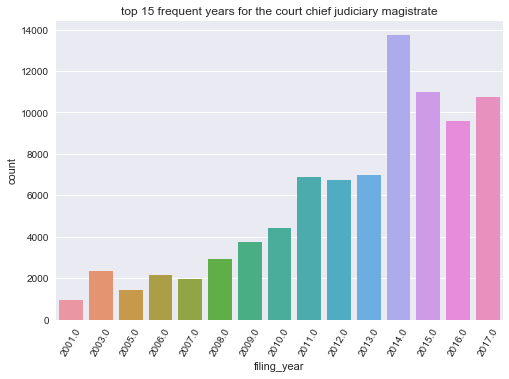

In [50]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_chief_jud_magistrate_top15)
plt.xticks(rotation = 60)
plt.ylabel('count')
plt.title('top 15 frequent years for the court chief judiciary magistrate')

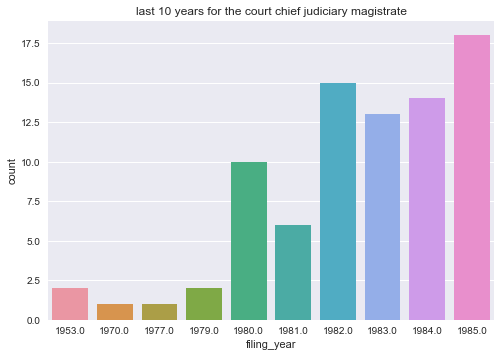

In [51]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_chief_jud_magistrate_last10)
plt.ylabel('count')
plt.title('last 10 years for the court chief judiciary magistrate')

# Court_name chied_jud_magis_jalna- filing_year

In [52]:
court_name_chief_jud_magistrate_jalna = df1.loc[df1['court_name']  == 'Chief Judicial Magistrate , Jalna']

In [53]:
df1_filing_year_chief_jud_magistrate_jalna = pd.DataFrame()
df1_filing_year_chief_jud_magistrate_jalna = court_name_chief_jud_magistrate_jalna.filing_year.value_counts().reset_index()
df1_filing_year_chief_jud_magistrate_jalna.columns = ["filing_year", "count"]
df1_filing_year_chief_jud_magistrate_jalna_top15 = df1_filing_year_chief_jud_magistrate_jalna.head(15)
df1_filing_year_chief_jud_magistrate_jalna_last10 = df1_filing_year_chief_jud_magistrate_jalna.tail(10)
df1_filing_year_chief_jud_magistrate_jalna

,filing_year,count
0,2007.0,4335
1,2006.0,4244
2,2005.0,3880
3,2008.0,3461
4,2009.0,3062
5,2010.0,2785
6,2011.0,2740
7,2012.0,2720
8,2004.0,2552
9,2013.0,2399


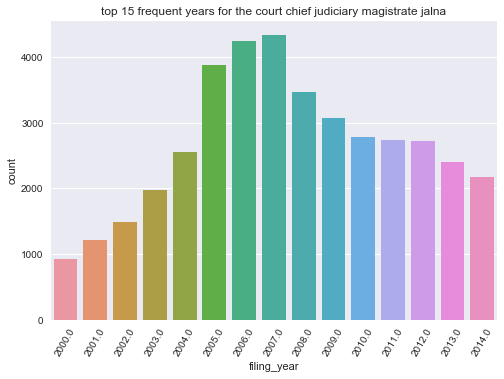

In [54]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_chief_jud_magistrate_jalna_top15)
plt.xticks(rotation = 60)
plt.ylabel('count')
plt.title('top 15 frequent years for the court chief judiciary magistrate jalna')

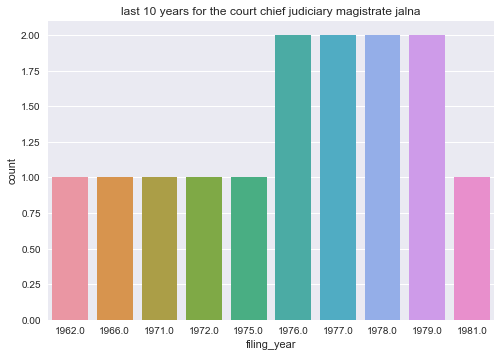

In [55]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_chief_jud_magistrate_jalna_last10)
plt.ylabel('count')
plt.title('last 10 years for the court chief judiciary magistrate jalna')

# court_name addl city civil- filing_year

In [56]:
court_name_addl = df1.loc[df1['court_name']  == 'ADDL. CITY CIVIL and SESSIONS JUDGES, MAYO HALL AND FTC, MAYOHALL']

In [57]:
df1_filing_year_addl = pd.DataFrame()
df1_filing_year_addl = court_name_addl.filing_year.value_counts().reset_index()
df1_filing_year_addl.columns = ["filing_year", "count"]
df1_filing_year_addl_top15 = df1_filing_year_addl.head(15)
df1_filing_year_addl_last10 = df1_filing_year_addl.tail(10)
df1_filing_year_addl

,filing_year,count
0,2009.0,3963
1,2010.0,3935
2,2011.0,3743
3,2005.0,3606
4,2012.0,3485
5,2004.0,3472
6,2013.0,3029
7,2006.0,3001
8,2007.0,2748
9,2014.0,2478


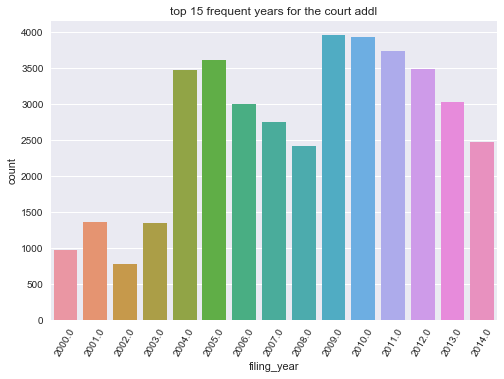

In [58]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_addl_top15)
plt.xticks(rotation = 60)
plt.ylabel('count')
plt.title('top 15 frequent years for the court addl')

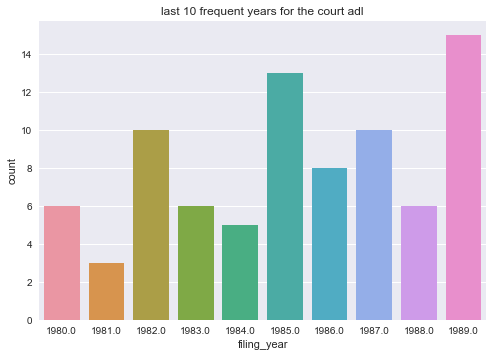

In [59]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_addl_last10)
plt.ylabel('count')
plt.title('last 10 frequent years for the court adl')

# court_nam district- filing_year

In [60]:
court_name_district = df1.loc[df1['court_name']  == 'District and Session Judge']

In [61]:
df1_filing_year_district = pd.DataFrame()
df1_filing_year_district = court_name_district.filing_year.value_counts().reset_index()
df1_filing_year_district.columns = ["filing_year", "count"]
df1_filing_year_district_top15 = df1_filing_year_district.head(15)
df1_filing_year_district_last10 = df1_filing_year_district.tail(10)
df1_filing_year_district

,filing_year,count
0,2014.0,8051
1,2012.0,5770
2,2011.0,5227
3,2013.0,5093
4,2016.0,2800
5,2015.0,2602
6,2010.0,2299
7,2009.0,1254
8,2008.0,987
9,2017.0,898


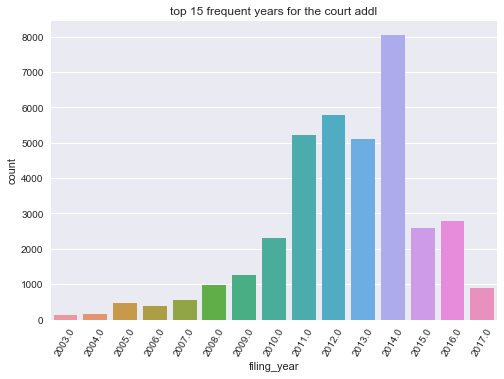

In [62]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_district_top15)
plt.xticks(rotation = 60)
plt.ylabel('count')
plt.title('top 15 frequent years for the court addl')

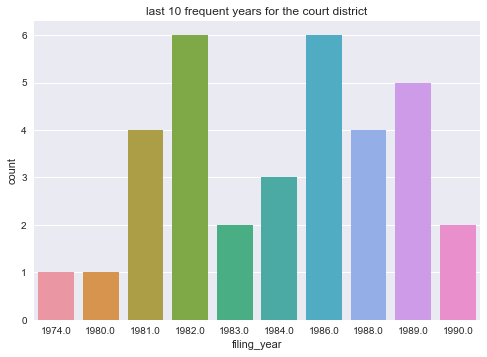

In [63]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_district_last10)
plt.ylabel('count')
plt.title('last 10 frequent years for the court district')

In [64]:
df1.before_honourable_judges.value_counts()

C.J.M.                                                23312
DISTRICT AND SESSIONS JUDGE BAGALKOT                  21757
SCH                                                   17439
METROPOLITAN MAGISTRATE (TRAFFIC COURT III)           14782
PRL. CIVIL JUDGE ( JR. DN.) andamp; JMFC              14510
District Judge                                        12593
Civil Judge Jr.Dn. and J.M.F.C., Digras               12415
CIVIL JUDGE andamp; JMFC                              11756
Chief Judicial Magistrate                             11574
Judicial Magistrate First Class                        9643
Jt.Civil Judge Jr.Dn. and J.M.F.C., Digras             9631
FTC                                                    8483
Addl. Chief Judicial Magistrate Court No. 2            7116
CIVIL JUDGE ( SR. DN.)                                 6798
Civil Judge and JMFC Banahatti                         6576
Jt. C.J.J.D. J.M.F.C. Kelapur                          6525
IIADDL. SENIOR CIVIL JUDGE BAGALKOT     

In [65]:
len(df1.before_honourable_judges.unique())

533

In [66]:
df1_before_honourable_judges = pd.DataFrame()
df1_before_honourable_judges = df1.before_honourable_judges.value_counts().reset_index()
df1_before_honourable_judges.columns = ["before_honourable_judges", "count"]
df1_before_honourable_judges_top15 = df1_before_honourable_judges.head(15)
df1_before_honourable_judges_top_16_26 = df1_before_honourable_judges.iloc[15:25, :]
df1_before_honourable_judges

,before_honourable_judges,count
0,C.J.M.,23312
1,DISTRICT AND SESSIONS JUDGE BAGALKOT,21757
2,SCH,17439
3,METROPOLITAN MAGISTRATE (TRAFFIC COURT III),14782
4,PRL. CIVIL JUDGE ( JR. DN.) andamp; JMFC,14510
5,District Judge,12593
6,"Civil Judge Jr.Dn. and J.M.F.C., Digras",12415
7,CIVIL JUDGE andamp; JMFC,11756
8,Chief Judicial Magistrate,11574
9,Judicial Magistrate First Class,9643


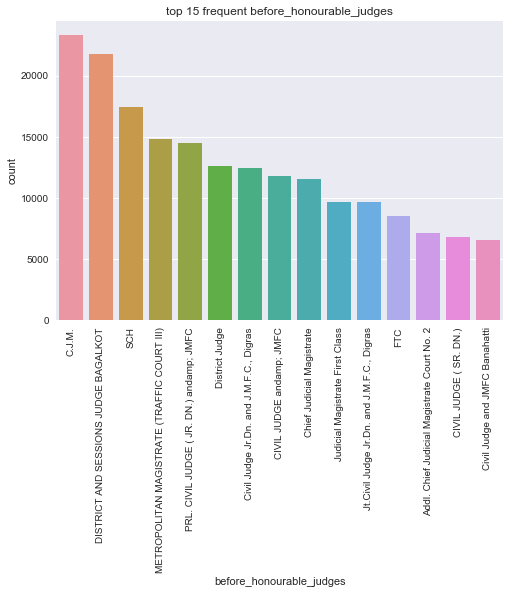

In [67]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', data = df1_before_honourable_judges_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 15 frequent before_honourable_judges')

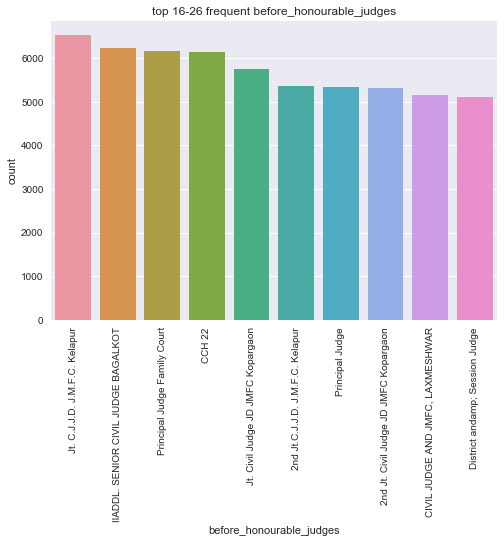

In [68]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', data = df1_before_honourable_judges_top_16_26)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 16-26 frequent before_honourable_judges')

# filing_year vs before honourable judges. see all the chunk of code

# filing_year 2014 va before honourable judges 

In [69]:
df1_before_honour_judge_2014 = pd.DataFrame()
df1_before_honour_judge_2014 = df1_filing_year_2014.before_honourable_judges.value_counts().reset_index()
df1_before_honour_judge_2014.columns = ["before_honourable_judges", "count"]
df1_before_honour_judge_2014_top15 = df1_before_honour_judge_2014.head(15)
df1_before_honour_judge_2014_top_16_26 = df1_before_honour_judge_2014.iloc[15:25, :]
df1_before_honour_judge_2014

,before_honourable_judges,count
0,Principal Judge Family Court,3268
1,Addl. Chief Judicial Magistrate Court No. 2,3241
2,METROPOLITAN MAGISTRATE (TRAFFIC COURT III),2537
3,CIVIL JUDGE andamp; JMFC,2501
4,IIADDL. SENIOR CIVIL JUDGE BAGALKOT,2407
5,"JFCM II JUDGE ,HOSDURG",2300
6,METROPOLITAN MAGISTRATE (TRAFFIC COURT IV),2191
7,District andamp; Session Judge,2175
8,PRL. CIVIL JUDGE ( JR. DN.) andamp; JMFC,2090
9,C.J.M.,2055


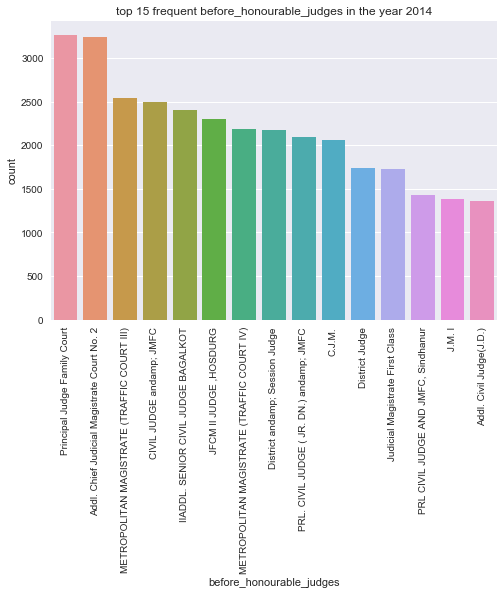

In [70]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', data = df1_before_honour_judge_2014_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 15 frequent before_honourable_judges in the year 2014')

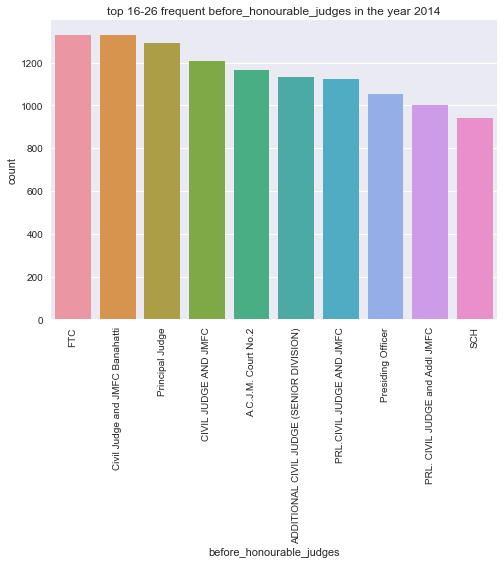

In [71]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', data = df1_before_honour_judge_2014_top_16_26)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 16-26 frequent before_honourable_judges in the year 2014')

# filing_year_2012- before honourable judges

In [72]:
df1_before_honour_judge_2012 = pd.DataFrame()
df1_before_honour_judge_2012 = df1_filing_year_2012.before_honourable_judges.value_counts().reset_index()
df1_before_honour_judge_2012.columns = ["before_honourable_judges", "count"]
df1_before_honour_judge_2012_top15 = df1_before_honour_judge_2012.head(15)
df1_before_honour_judge_2012_top_16_26 = df1_before_honour_judge_2012.iloc[15:25, :]
df1_before_honour_judge_2012

,before_honourable_judges,count
0,SCH,2477
1,V Addl. Civil Judge (J.D.),2237
2,DISTRICT AND SESSIONS JUDGE BAGALKOT,1560
3,FTC,1536
4,Judicial Magistrate First Class,1438
5,District Judge,1426
6,IIADDL. SENIOR CIVIL JUDGE BAGALKOT,1380
7,IV Addl. Civil Judge (J.D.),1285
8,PRL. CIVIL JUDGE and Addl JMFC,1181
9,Civil Judge and JMFC Banahatti,1144


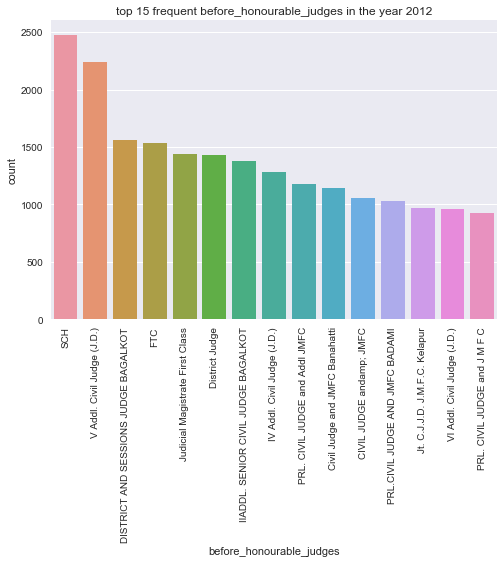

In [73]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', data = df1_before_honour_judge_2012_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 15 frequent before_honourable_judges in the year 2012')

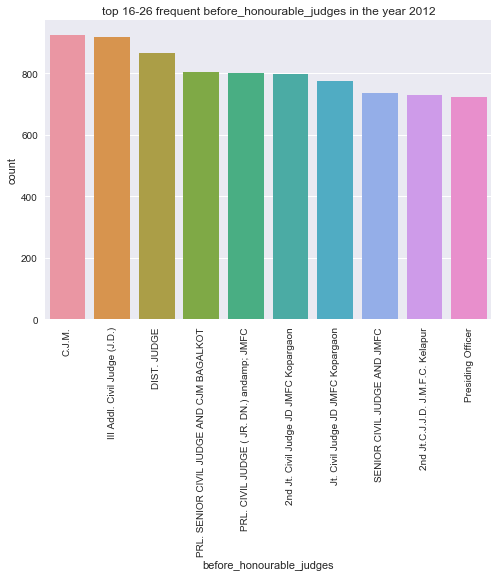

In [74]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', data = df1_before_honour_judge_2012_top_16_26)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 16-26 frequent before_honourable_judges in the year 2012')

# filing_year2011 vs before honourable judges 

In [75]:
df1_before_honour_judge_2011 = pd.DataFrame()
df1_before_honour_judge_2011 = df1_filing_year_2011.before_honourable_judges.value_counts().reset_index()
df1_before_honour_judge_2011.columns = ["before_honourable_judges", "count"]
df1_before_honour_judge_2011_top15 = df1_before_honour_judge_2011.head(15)
df1_before_honour_judge_2011_top_16_26 = df1_before_honour_judge_2011.iloc[15:25, :]
df1_before_honour_judge_2011

,before_honourable_judges,count
0,SCH,4072
1,FTC,1755
2,DISTRICT AND SESSIONS JUDGE BAGALKOT,1670
3,PRL. CIVIL JUDGE ( JR. DN.) andamp; JMFC,1382
4,A.C.J.M. Court No.3,1116
5,Judicial Magistrate First Class,1105
6,District Judge,1084
7,CIVIL JUDGE andamp; JMFC,1018
8,C J J D J M F C Jamner,894
9,Jt. C.J.J.D. J.M.F.C. Kelapur,887


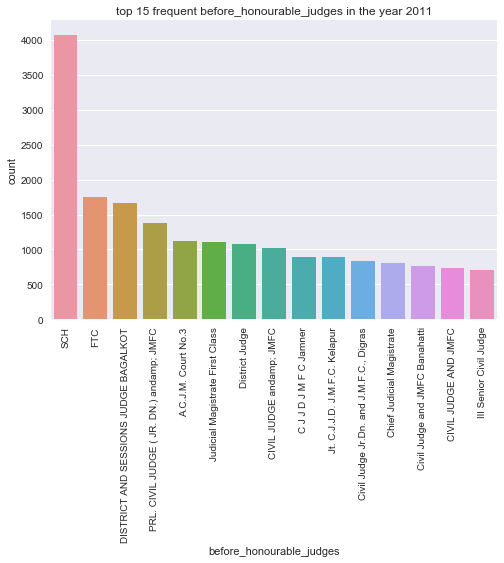

In [76]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', data = df1_before_honour_judge_2011_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 15 frequent before_honourable_judges in the year 2011')

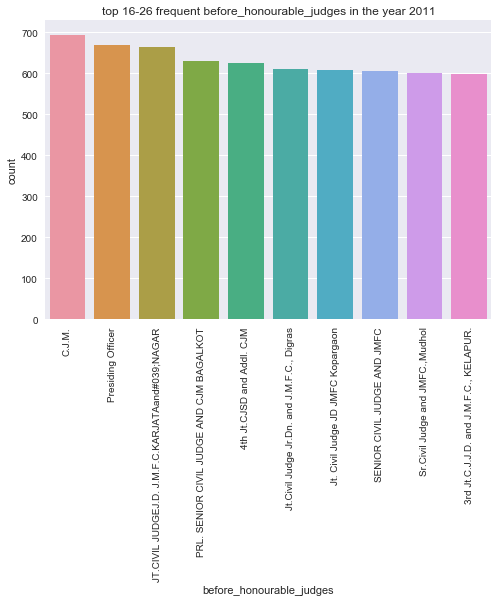

In [77]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', data = df1_before_honour_judge_2011_top_16_26)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 16-26 frequent before_honourable_judges in the year 2011')

# filing year 2013 vs before honourable judges 

In [78]:
df1_before_honour_judge_2013 = pd.DataFrame()
df1_before_honour_judge_2013 = df1_filing_year_2013.before_honourable_judges.value_counts().reset_index()
df1_before_honour_judge_2013.columns = ["before_honourable_judges", "count"]
df1_before_honour_judge_2013_top15 = df1_before_honour_judge_2013.head(15)
df1_before_honour_judge_2013_top_16_26 = df1_before_honour_judge_2013.iloc[15:25, :]
df1_before_honour_judge_2013

,before_honourable_judges,count
0,PRL. CIVIL JUDGE and J M F C,1994
1,PRL. CIVIL JUDGE ( JR. DN.) andamp; JMFC,1968
2,District Judge,1832
3,CIVIL JUDGE andamp; JMFC,1571
4,Judicial Magistrate First Class,1558
5,"PRL CIVIL JUDGE AND JMFC, Sindhanur",1551
6,SCH,1513
7,DISTRICT AND SESSIONS JUDGE BAGALKOT,1485
8,PRL. CIVIL JUDGE and Addl JMFC,1279
9,Civil Judge and JMFC Banahatti,1163


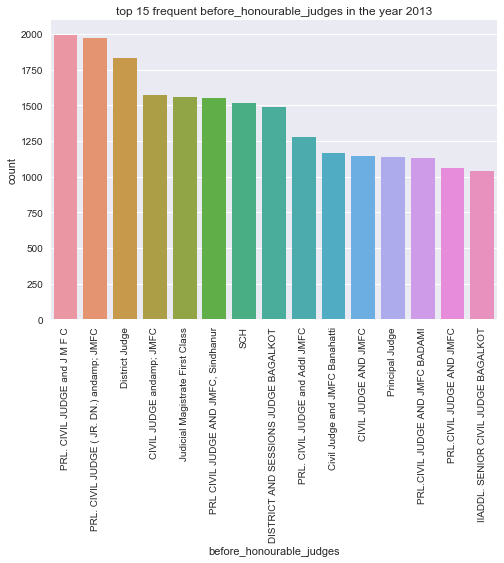

In [79]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', data = df1_before_honour_judge_2013_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 15 frequent before_honourable_judges in the year 2013')

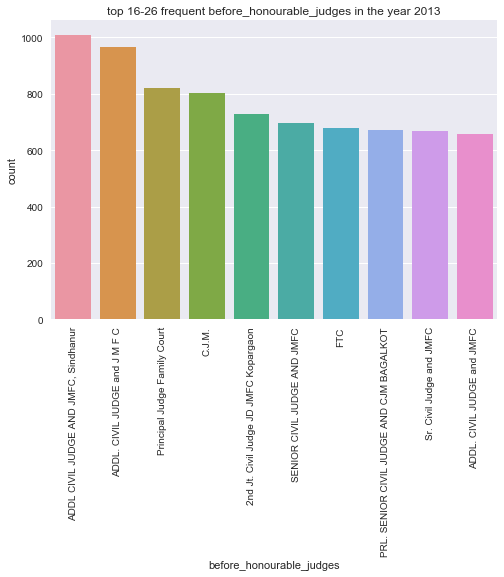

In [80]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', data = df1_before_honour_judge_2013_top_16_26)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 16-26 frequent before_honourable_judges in the year 2013')

# honourable judges cjm vs filing year

In [81]:
df1_before_honourable_judges_cjm = df1.loc[df1['before_honourable_judges'] == 'C.J.M.']

In [82]:
df1_filing_year_before_honourable_judges_cjm = pd.DataFrame()
df1_filing_year_before_honourable_judges_cjm = df1_before_honourable_judges_cjm.filing_year.value_counts().reset_index()
df1_filing_year_before_honourable_judges_cjm.columns = ["filing_year", "count"]
df1_filing_year_before_honourable_judges_cjm_top15 = df1_filing_year_before_honourable_judges_cjm.head(15)
df1_filing_year_before_honourable_judges_cjm_last10 = df1_filing_year_before_honourable_judges_cjm.tail(10)
df1_filing_year_before_honourable_judges_cjm

,filing_year,count
0,2017.0,5093
1,2015.0,4740
2,2016.0,4519
3,2014.0,2055
4,2012.0,926
5,2013.0,803
6,2011.0,694
7,2009.0,590
8,2003.0,526
9,2010.0,453


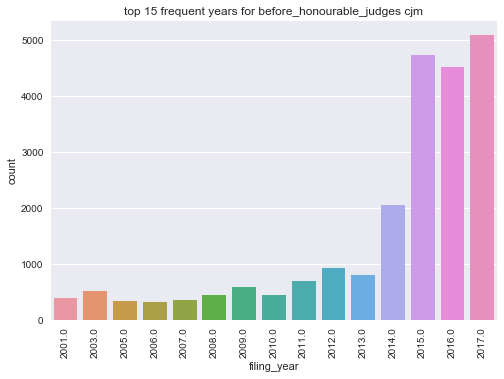

In [83]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_before_honourable_judges_cjm_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 15 frequent years for before_honourable_judges cjm')

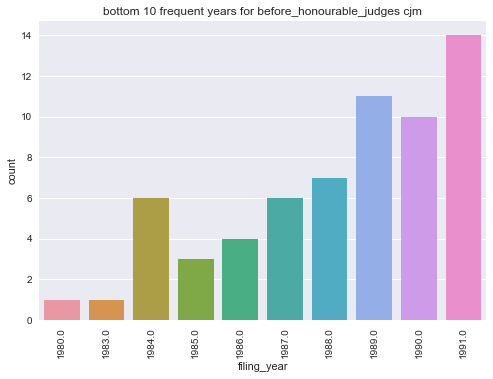

In [84]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_before_honourable_judges_cjm_last10)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('bottom 10 frequent years for before_honourable_judges cjm')

# honourable judges district - filing_year 

In [85]:
df1_before_honourable_judges_district = df1.loc[df1['before_honourable_judges'] == 'DISTRICT AND SESSIONS JUDGE BAGALKOT']

In [86]:
df1_filing_year_before_honourable_judges_district = pd.DataFrame()
df1_filing_year_before_honourable_judges_district = df1_before_honourable_judges_district.filing_year.value_counts().reset_index()
df1_filing_year_before_honourable_judges_district.columns = ["filing_year", "count"]
df1_filing_year_before_honourable_judges_district_top15 = df1_filing_year_before_honourable_judges_district.head(15)
df1_filing_year_before_honourable_judges_district_last10 = df1_filing_year_before_honourable_judges_district.tail(10)
df1_filing_year_before_honourable_judges_district

,filing_year,count
0,2001.0,1963
1,2009.0,1948
2,2010.0,1826
3,2006.0,1721
4,2008.0,1702
5,2007.0,1700
6,2011.0,1670
7,2012.0,1560
8,2005.0,1543
9,2013.0,1485


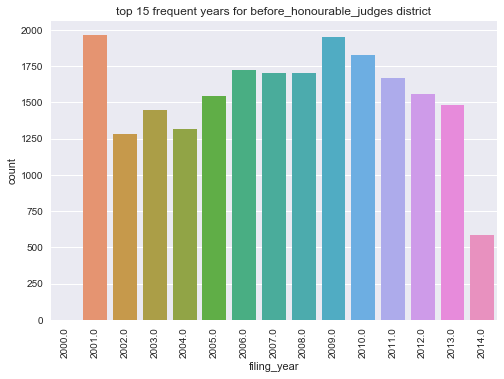

In [87]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_before_honourable_judges_district_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 15 frequent years for before_honourable_judges district')

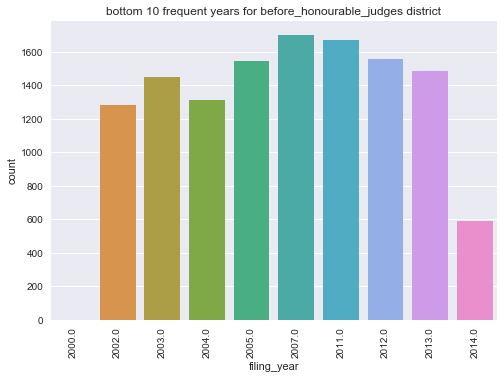

In [88]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_before_honourable_judges_district_last10)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('bottom 10 frequent years for before_honourable_judges district')

# honourable judges sch- filing_year

In [89]:
df1_before_honourable_judges_sch = df1.loc[df1['before_honourable_judges'] == 'sch']

In [90]:
df1_filing_year_before_honourable_judges_sch = pd.DataFrame()
df1_filing_year_before_honourable_judges_sch = df1_before_honourable_judges_sch.filing_year.value_counts().reset_index()
df1_filing_year_before_honourable_judges_sch.columns = ["filing_year", "count"]
df1_filing_year_before_honourable_judges_sch_top15 = df1_filing_year_before_honourable_judges_sch.head(15)
df1_filing_year_before_honourable_judges_sch_last10 = df1_filing_year_before_honourable_judges_sch.tail(10)
df1_filing_year_before_honourable_judges_sch

,filing_year,count


In [91]:
df1_before_honourable_judges_metro = df1.loc[df1['before_honourable_judges'] == 'METROPOLITAN MAGISTRATE (TRAFFIC COURT III)']

In [92]:
df1_filing_year_before_honourable_judges_metro = pd.DataFrame()
df1_filing_year_before_honourable_judges_metro = df1_before_honourable_judges_cjm.filing_year.value_counts().reset_index()
df1_filing_year_before_honourable_judges_metro.columns = ["filing_year", "count"]
df1_filing_year_before_honourable_judges_metro_top15 = df1_filing_year_before_honourable_judges_metro.head(15)
df1_filing_year_before_honourable_judges_metro_last10 = df1_filing_year_before_honourable_judges_metro.tail(10)
df1_filing_year_before_honourable_judges_metro

,filing_year,count
0,2017.0,5093
1,2015.0,4740
2,2016.0,4519
3,2014.0,2055
4,2012.0,926
5,2013.0,803
6,2011.0,694
7,2009.0,590
8,2003.0,526
9,2010.0,453


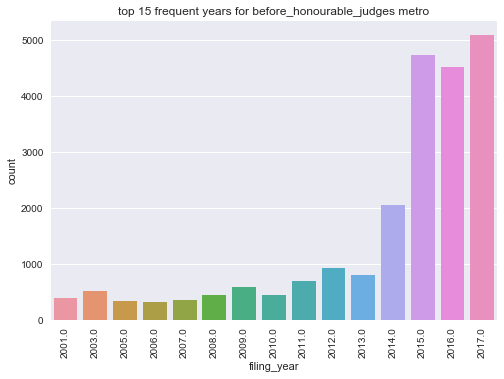

In [93]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_before_honourable_judges_metro_top15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 15 frequent years for before_honourable_judges metro')

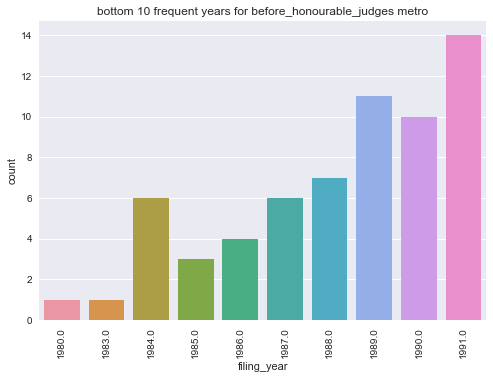

In [94]:
ax = sns.barplot(x = 'filing_year', y = 'count', data = df1_filing_year_before_honourable_judges_metro_last10)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('bottom 10 frequent years for before_honourable_judges metro')

# court name chied jud magistrate - before_honouable judges

In [95]:
df1_before_honourable_court_name_chief_jud_magistrate = pd.DataFrame()
df1_before_honourable_court_name_chief_jud_magistrate = court_name_chief_jud_magistrate.before_honourable_judges.value_counts().reset_index()                     
df1_before_honourable_court_name_chief_jud_magistrate.columns = ["before_honourable_judges", "count"]
df1_before_honourable_court_name_chief_jud_magistrate_top_15 = df1_before_honourable_court_name_chief_jud_magistrate.head(15)
df1_before_honourable_court_name_chief_jud_magistrate_bottom_10 = df1_before_honourable_court_name_chief_jud_magistrate.tail(10)
df1_before_honourable_court_name_chief_jud_magistrate

,before_honourable_judges,count
0,C.J.M.,23312
1,Chief Judicial Magistrate,8440
2,Addl. Chief Judicial Magistrate Court No. 2,7116
3,A.C.J.M.,5006
4,A.C.J.M. Court No.3,3471
5,J.M. I,3445
6,ACJM I,3376
7,Judicial Magistrate,2672
8,ACJM II,2628
9,Addl. Civil Judge(J.D.),2415


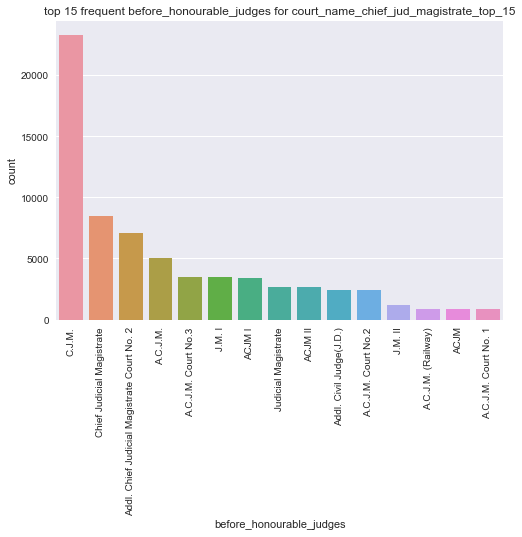

In [96]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', data = df1_before_honourable_court_name_chief_jud_magistrate_top_15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 15 frequent before_honourable_judges for court_name_chief_jud_magistrate_top_15')

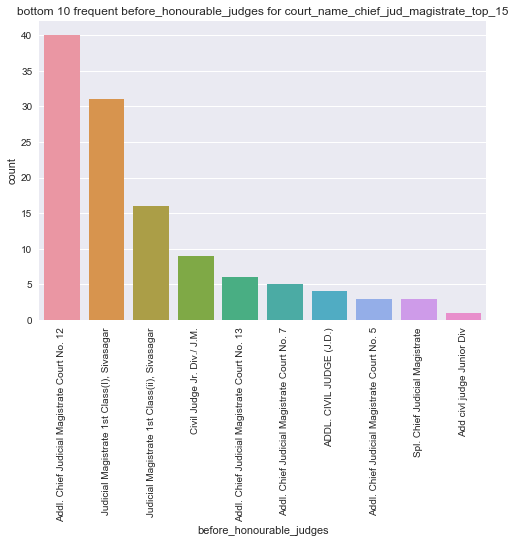

In [97]:
ax = sns.barplot(x = 'before_honourable_judges', 
                 y = 'count', 
                 data = df1_before_honourable_court_name_chief_jud_magistrate_bottom_10)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('bottom 10 frequent before_honourable_judges for court_name_chief_jud_magistrate_top_15')

# court_name chief jud magistrate jalna - before honourable court

In [98]:
df1_before_honourable_court_name_chief_jud_magistrate_jalna = pd.DataFrame()
df1_before_honourable_court_name_chief_jud_magistrate_jalna = court_name_chief_jud_magistrate_jalna.before_honourable_judges.value_counts().reset_index()                     
df1_before_honourable_court_name_chief_jud_magistrate_jalna.columns = ["before_honourable_judges", "count"]
df1_before_honourable_court_name_chief_jud_magistrate_jalna_top_15 = df1_before_honourable_court_name_chief_jud_magistrate_jalna.head(15)
df1_before_honourable_court_name_chief_jud_magistrate_jalna_bottom_10 = df1_before_honourable_court_name_chief_jud_magistrate_jalna.tail(10)
df1_before_honourable_court_name_chief_jud_magistrate_jalna

,before_honourable_judges,count
0,Judicial Magistrate First Class,9643
1,Chief Judicial Magistrate,3132
2,3rd jt.jmfc,2043
3,J.M.F.C. COURT NO. 1 JALNA.,1961
4,4th Jt.JMFC,1706
5,IInd JMFC,870
6,JUVENILE COURT,732
7,EVENING COURT NO. 2 JALNA.,501
8,EVENING COURT NO. 1 JALNA,399
9,Evening Court,241


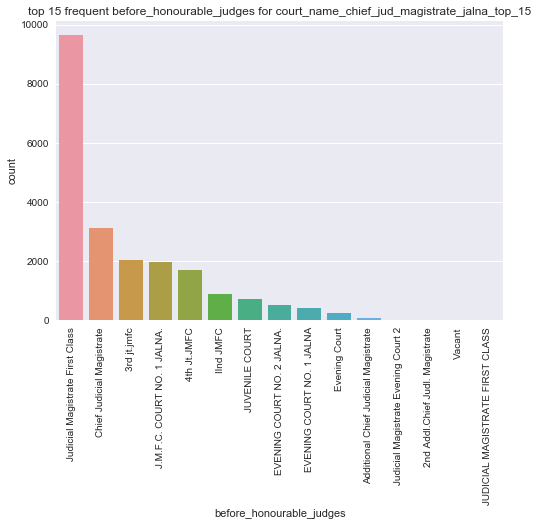

In [99]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', 
                 data = df1_before_honourable_court_name_chief_jud_magistrate_jalna_top_15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 15 frequent before_honourable_judges for court_name_chief_jud_magistrate_jalna_top_15')

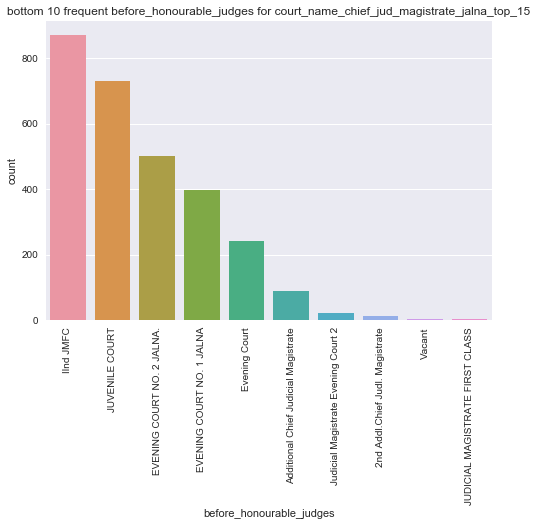

In [100]:
ax = sns.barplot(x = 'before_honourable_judges', 
                 y = 'count', 
                 data = df1_before_honourable_court_name_chief_jud_magistrate_jalna_bottom_10)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('bottom 10 frequent before_honourable_judges for court_name_chief_jud_magistrate_jalna_top_15')

# court name addl vs before_honourable court

In [101]:
df1_before_honourable_court_name_addl = pd.DataFrame()
df1_before_honourable_court_name_addl = court_name_addl.before_honourable_judges.value_counts().reset_index()                     
df1_before_honourable_court_name_addl.columns = ["before_honourable_judges", "count"]
df1_before_honourable_court_name_addl_top_15 = df1_before_honourable_court_name_addl.head(15)
df1_before_honourable_court_name_addl_bottom_10 = df1_before_honourable_court_name_addl.tail(10)
df1_before_honourable_court_name_addl

,before_honourable_judges,count
0,FTC,8483
1,CCH 22,6128
2,CCH 21,4678
3,CCH 20,4598
4,CCH 29,4561
5,CCH58,126


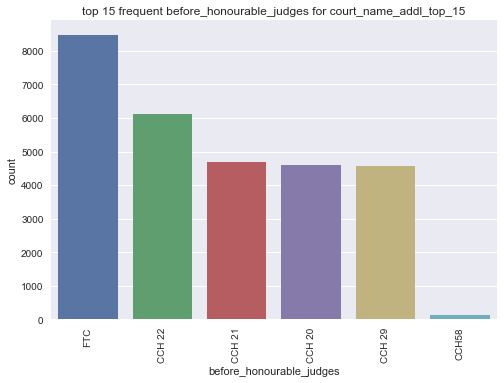

In [102]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', 
                 data = df1_before_honourable_court_name_addl_top_15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 15 frequent before_honourable_judges for court_name_addl_top_15')

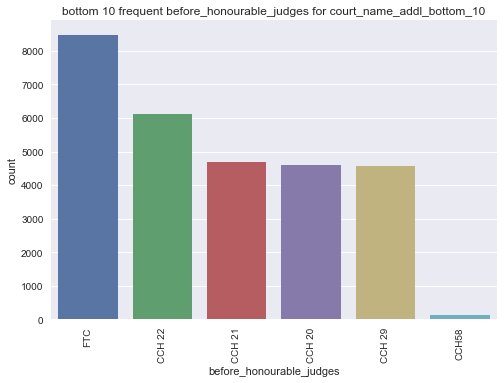

In [103]:
ax = sns.barplot(x = 'before_honourable_judges', 
                 y = 'count', 
                 data = df1_before_honourable_court_name_addl_bottom_10)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('bottom 10 frequent before_honourable_judges for court_name_addl_bottom_10')

# court name district- before honourable

In [104]:
df1_before_honourable_court_name_district = pd.DataFrame()
df1_before_honourable_court_name_district = court_name_district.before_honourable_judges.value_counts().reset_index()                     
df1_before_honourable_court_name_district.columns = ["before_honourable_judges", "count"]
df1_before_honourable_court_name_district_top_15 = df1_before_honourable_court_name_district.head(15)
df1_before_honourable_court_name_district_bottom_10 = df1_before_honourable_court_name_district.tail(10)
df1_before_honourable_court_name_district

,before_honourable_judges,count
0,District andamp; Session Judge,5100
1,ADDITIONAL DISTRICT AND SESSIONS JUDGE COURT NO.1,1335
2,Spl. Judge (DAA),1172
3,"SPECIAL JUDGE(SC/ST,PEV.OF ATROCI ACT)",1113
4,District Judge,1106
5,Addl District Judge/ Special Judge D.A.A. Auraiya,913
6,Addl. District andamp; Sessions Judge,910
7,Spl. Judge(SC/ST),805
8,Addl. District/Session Judge 3,774
9,ADDITIONAL DISTRICT AND SESSIONS JUDGE COURT NO.2,728


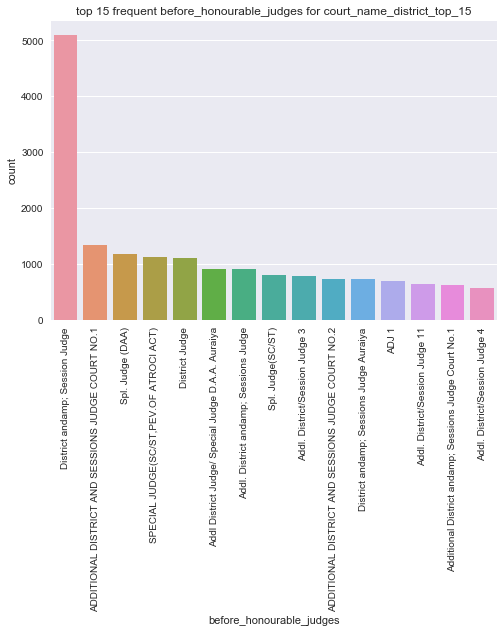

In [105]:
ax = sns.barplot(x = 'before_honourable_judges', y = 'count', 
                 data = df1_before_honourable_court_name_district_top_15)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('top 15 frequent before_honourable_judges for court_name_district_top_15')

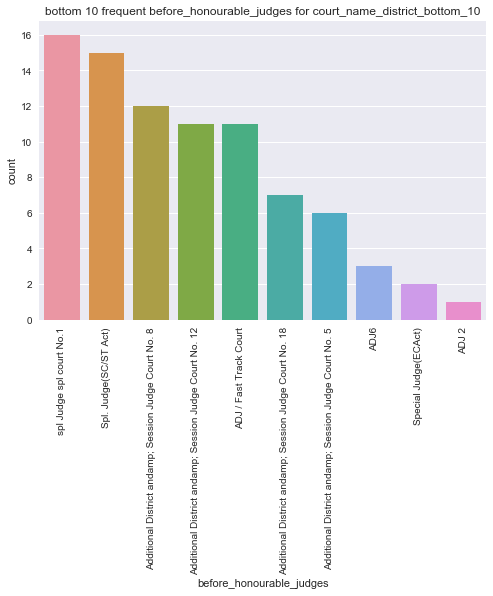

In [106]:
ax = sns.barplot(x = 'before_honourable_judges', 
                 y = 'count', 
                 data = df1_before_honourable_court_name_district_bottom_10)
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('bottom 10 frequent before_honourable_judges for court_name_district_bottom_10')

# before-honourable judges-court_name

In [107]:
df1_court_name_before_honourable_judges_cjm = pd.DataFrame()
df1_court_name_before_honourable_judges_cjm = df1_before_honourable_judges_cjm.court_name.value_counts().reset_index()
df1_court_name_before_honourable_judges_cjm.columns = ["court_name", "count"]
df1_court_name_before_honourable_judges_cjm_top15 = df1_court_name_before_honourable_judges_cjm.head(15)
df1_court_name_before_honourable_judges_cjm_last10 = df1_court_name_before_honourable_judges_cjm.tail(10)
df1_court_name_before_honourable_judges_cjm

,court_name,count
0,Chief Judicial Magistrate,23312


In [108]:
df1_court_name_before_honourable_judges_district = pd.DataFrame()
df1_court_name_before_honourable_judges_district = df1_before_honourable_judges_district.court_name.value_counts().reset_index()
df1_court_name_before_honourable_judges_district.columns = ["court_name", "count"]
df1_court_name_before_honourable_judges_district_top15 = df1_court_name_before_honourable_judges_district.head(15)
df1_court_name_before_honourable_judges_district_last10 = df1_court_name_before_honourable_judges_district.tail(10)
df1_court_name_before_honourable_judges_district

,court_name,count
0,Dist. and Sessions Judge,21757


In [109]:
df1_court_name_before_honourable_judges_sch = pd.DataFrame()
df1_court_name_before_honourable_judges_sch = df1_before_honourable_judges_sch.court_name.value_counts().reset_index()
df1_court_name_before_honourable_judges_sch.columns = ["court_name", "count"]
df1_court_name_before_honourable_judges_sch_top15 = df1_court_name_before_honourable_judges_sch.head(15)
df1_court_name_before_honourable_judges_sch_last10 = df1_court_name_before_honourable_judges_sch.tail(10)
df1_court_name_before_honourable_judges_sch

,court_name,count


In [110]:
df1_court_name_before_honourable_judges_metro = pd.DataFrame()
df1_court_name_before_honourable_judges_metro = df1_before_honourable_judges_metro.court_name.value_counts().reset_index()
df1_court_name_before_honourable_judges_metro.columns = ["court_name", "count"]
df1_court_name_before_honourable_judges_metro_top15 = df1_court_name_before_honourable_judges_metro.head(15)
df1_court_name_before_honourable_judges_metro_last10 = df1_court_name_before_honourable_judges_metro.tail(10)
df1_court_name_before_honourable_judges_metro

,court_name,count
0,METROPOLITAN MAGISTRATE (TRAFFIC COURT III),14782


# forming the combination of top frequent filing year, courtname and before honourable judges

In [111]:
strange_df = df1.loc[(df1['filing_year'] == 2014) |
                     (df1['filing_year'] == 2012) |
                     (df1['filing_year'] == 2011) |
                     (df1['filing_year'] == 2013) ]

In [112]:
strange_df1 = strange_df.loc[ (strange_df['court_name'] == 'Chief Judicial Magistrate') | 
                             (strange_df['court_name'] == 'Chief Judicial Magistrate , Jalna') |
                             (strange_df['court_name'] == 'ADDL. CITY CIVIL and SESSIONS JUDGES, MAYO HALL AND FTC, MAYOHALL') ] 

In [113]:
strange_df2 = strange_df1.loc[ (strange_df1['before_honourable_judges'] == 'C.J.M.' ) | (strange_df1['before_honourable_judges'] == 'DISTRICT AND SESSIONS JUDGE BAGALKOT' ) | (strange_df1['before_honourable_judges'] == 'SCH' )  ]

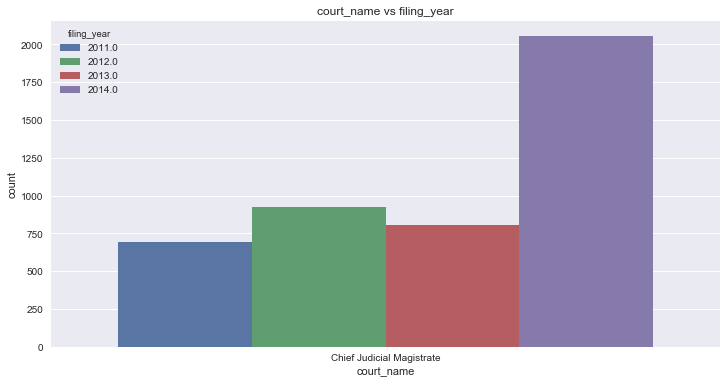

In [114]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="court_name",
              hue='filing_year',
              data=strange_df2).set_title('court_name vs filing_year');

(array([0]), <a list of 1 Text xticklabel objects>)

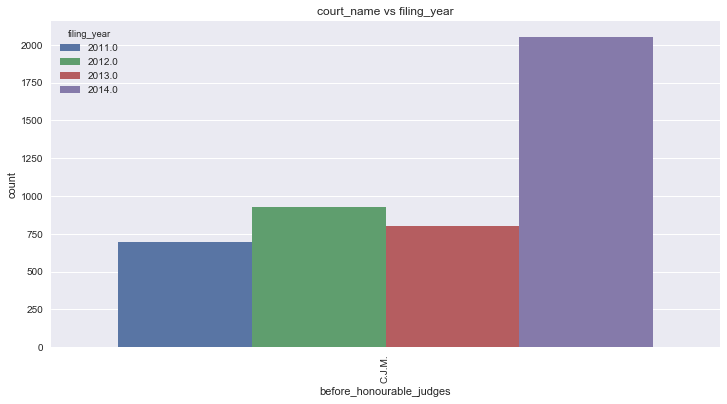

In [115]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="before_honourable_judges",
              hue='filing_year',
              data=strange_df2).set_title('court_name vs filing_year');
plt.xticks(rotation = 90)

In [116]:
df1.date_filed.value_counts()

2009-01-01    5535
2015-12-08     729
2013-12-06     728
2006-01-01     724
2012-07-04     722
2010-01-01     709
2012-07-18     678
2015-11-30     612
2011-01-01     611
2012-01-16     575
2012-07-17     560
2013-11-19     531
2005-02-11     529
2014-02-03     513
2015-12-11     512
2013-12-10     479
2012-07-19     467
2013-11-23     447
2008-01-01     443
2005-01-01     436
2014-11-25     432
2014-11-28     429
2014-03-14     427
2014-11-21     422
2014-11-18     422
2014-11-11     419
2014-03-20     419
2014-12-01     419
2014-02-07     415
2012-07-02     415
              ... 
2009-04-05       1
1976-12-23       1
1983-07-06       1
2010-12-12       1
2000-10-27       1
2002-11-09       1
1974-05-31       1
1987-10-20       1
1985-05-21       1
1981-07-25       1
1982-04-12       1
1982-07-28       1
1977-07-12       1
1981-10-26       1
1984-04-26       1
1987-11-27       1
1988-01-11       1
1991-02-22       1
1990-03-03       1
1981-04-21       1
1987-03-30       1
1984-03-07  

In [117]:
df1.decision_date.value_counts()

2014-12-06    18093
2008-03-28    15201
2013-04-03    14925
2012-07-28     8539
2012-07-01     7172
2013-11-23     6221
2015-12-12     5905
2016-10-14     5365
2017-07-08     4513
2014-12-12     4022
2017-04-08     3694
2014-04-12     3152
2016-11-12     3129
2013-10-02     3106
2017-02-11     2205
2013-02-01     2071
2014-02-08     1713
2014-12-13     1629
2016-05-18     1612
2009-01-06     1452
2015-04-11     1443
2004-12-31     1328
2011-02-06     1309
2012-09-16     1287
2005-12-31     1283
2003-12-31     1224
2012-01-16     1209
2015-04-10     1185
2013-03-03     1159
2013-08-31     1126
              ...  
1999-12-09        1
2009-10-17        1
1997-10-16        1
2005-06-11        1
2004-12-05        1
2000-03-15        1
2000-12-13        1
2000-01-19        1
2008-04-13        1
1998-10-29        1
2002-08-10        1
2009-04-26        1
2003-07-06        1
2024-03-15        1
2005-01-23        1
1998-02-24        1
2004-08-01        1
2017-11-27        1
2000-11-14        1


# Date filed and decision date are not in appropriate format lets convert them into years and month separately

In [118]:
def get_month(x):
    txt = str(x)
    y = txt.split('-')
    if len(y) != 3:
        return 'NaN'
    return int(y[1])

def get_year(x):
    txt = str(x)
    y = txt.split('-')
    if len(y) != 3:
        return 'NaN'
    return int(y[0])

In [119]:
df1['date_filed_MONTH'] = df1['date_filed'].map(lambda x: get_month(x))
df1['date_filed_YEAR'] = df1['date_filed'].map(lambda x: get_year(x))

In [120]:
df1['decision_date_MONTH'] = df1['decision_date'].map(lambda x: get_month(x))
df1['decision_date_YEAR'] = df1['decision_date'].map(lambda x: get_year(x))

In [121]:
df1.head()

,combined_case_number,filing_year,court_name,before_honourable_judges,date_filed,current_status,nature_of_disposal,decision_date,date_filed_MONTH,date_filed_YEAR,decision_date_MONTH,decision_date_YEAR
0,CRI. CASE-6764-2014,2014.0,Chief Judicial Magistrate,Addl. Chief Judicial Magistrate Court No. 2,NaN,Disposed,Contested--DECIDED,2014-12-06,NaN,NaN,12,2014
1,CRI. CASE-6763-2014,2014.0,Chief Judicial Magistrate,Addl. Chief Judicial Magistrate Court No. 2,NaN,Disposed,Contested--DECIDED,2014-12-06,NaN,NaN,12,2014
2,CRI. CASE-6756-2014,2014.0,Chief Judicial Magistrate,Addl. Chief Judicial Magistrate Court No. 2,NaN,Disposed,Contested--DECIDED,2014-12-06,NaN,NaN,12,2014
3,CRI. CASE-6755-2014,2014.0,Chief Judicial Magistrate,Addl. Chief Judicial Magistrate Court No. 2,NaN,Disposed,Contested--DECIDED,2014-12-06,NaN,NaN,12,2014
4,CRI. CASE-6752-2014,2014.0,Chief Judicial Magistrate,Addl. Chief Judicial Magistrate Court No. 2,NaN,Disposed,Contested--DECIDED,2014-12-06,NaN,NaN,12,2014


# Lets drop date_filed and decision_date, they are unimportant now

In [122]:
df1 = df1.drop('date_filed', axis = 1)
df1 = df1.drop('decision_date', axis = 1)

In [123]:
df1.dtypes

combined_case_number         object
filing_year                 float64
court_name                   object
before_honourable_judges     object
current_status               object
nature_of_disposal           object
date_filed_MONTH             object
date_filed_YEAR              object
decision_date_MONTH          object
decision_date_YEAR           object
dtype: object

In [124]:
df1.date_filed_MONTH.value_counts()

NaN    255766
1       63261
7       62183
12      57581
3       54822
8       54587
9       53631
11      52332
2       51277
4       50677
10      49404
6       48485
5       44230
Name: date_filed_MONTH, dtype: int64

In [125]:
df1.date_filed_YEAR.value_counts()

NaN     255766
2014     71220
2013     61737
2012     59000
2011     52138
2009     41440
2010     40150
2005     37003
2006     36939
2008     35007
2007     34536
2004     28915
2003     22919
2002     18739
2001     16305
2015     15983
2016     12749
2017     12372
2000     11481
1999      6863
1998      6378
1997      4475
1996      2911
1991      1909
1995      1883
1993      1831
1990      1774
1994      1603
1992      1223
1989       649
         ...  
1978        26
1974        19
1973        15
1975        13
1905        11
1899        11
1970        10
1972         8
1969         6
1971         5
1967         4
1966         4
1968         3
2021         3
1953         3
1958         3
1964         3
1965         2
1962         2
1900         1
1917         1
3008         1
3002         1
2023         1
2025         1
2028         1
2300         1
9999         1
2020         1
2019         1
Name: date_filed_YEAR, Length: 72, dtype: int64

In [126]:
df1.decision_date_MONTH.value_counts()

12     102597
7       92624
3       85322
4       84446
1       75262
11      74060
10      72244
8       71335
2       70647
9       69966
6       56240
5       43110
NaN       383
Name: decision_date_MONTH, dtype: int64

In [127]:
df1.decision_date_YEAR.value_counts()

2014    133919
2013    115495
2012     97231
2015     85302
2011     65764
2008     64329
2010     55683
2016     53571
2009     52741
2007     47784
2006     42911
2005     20534
2017     17951
2004     14965
2003     12363
2002      9423
2001      6717
2000       869
NaN        383
1999        95
1998        47
1995        29
1997        25
1996        24
1899        22
1993        16
1994        13
1990         7
1991         5
1983         4
2025         2
1992         2
1974         2
2024         2
2051         1
2091         1
1988         1
1985         1
1982         1
1975         1
Name: decision_date_YEAR, dtype: int64

In [128]:
df1_data_filed_month = pd.DataFrame()
df1_data_filed_month = df1.date_filed_MONTH.value_counts().reset_index()
df1_data_filed_month.columns = ["date_filed_MONTH", "count"]
df1_data_filed_month

,date_filed_MONTH,count
0,NaN,255766
1,1,63261
2,7,62183
3,12,57581
4,3,54822
5,8,54587
6,9,53631
7,11,52332
8,2,51277
9,4,50677


In [129]:
monthSorted = df1_data_filed_month.sort_values(by="count",ascending=False)

In [130]:
monthSorted.loc[ monthSorted['date_filed_MONTH'] == 1, 'date_filed_MONTH'] = 'Jan'
monthSorted.loc[ monthSorted['date_filed_MONTH'] == 2, 'date_filed_MONTH'] = 'Feb'
monthSorted.loc[ monthSorted['date_filed_MONTH'] == 3, 'date_filed_MONTH'] = 'Mar'
monthSorted.loc[ monthSorted['date_filed_MONTH'] == 4, 'date_filed_MONTH'] = 'Apr'
monthSorted.loc[ monthSorted['date_filed_MONTH'] == 5, 'date_filed_MONTH'] = 'May'
monthSorted.loc[ monthSorted['date_filed_MONTH'] == 6, 'date_filed_MONTH'] = 'June'
monthSorted.loc[ monthSorted['date_filed_MONTH'] == 7, 'date_filed_MONTH'] = 'July'
monthSorted.loc[ monthSorted['date_filed_MONTH'] == 8, 'date_filed_MONTH'] = 'Aug'
monthSorted.loc[ monthSorted['date_filed_MONTH'] == 9, 'date_filed_MONTH'] = 'Sep'
monthSorted.loc[ monthSorted['date_filed_MONTH'] == 10, 'date_filed_MONTH'] = 'Oct'
monthSorted.loc[ monthSorted['date_filed_MONTH'] == 11, 'date_filed_MONTH'] = 'Nov'
monthSorted.loc[ monthSorted['date_filed_MONTH'] == 12, 'date_filed_MONTH'] = 'Dec'

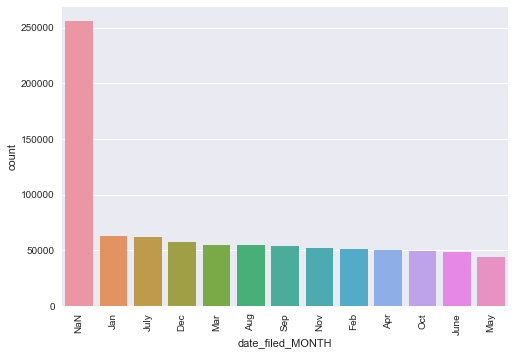

In [131]:
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December",
            "none"]
sns.barplot(data = monthSorted, x="date_filed_MONTH",y="count")
plt.xticks(rotation = 90)
plt.ylabel('count')

In [132]:
df1_data_filed_year = pd.DataFrame()
df1_data_filed_year = df1.date_filed_YEAR.value_counts().reset_index()
df1_data_filed_year.columns = ["date_filed_YEAR", "count"]
df1_data_filed_year_top10 = df1_data_filed_year.head(10)
df1_data_filed_year_last10 = df1_data_filed_year.tail(10)
df1_data_filed_year

,date_filed_YEAR,count
0,NaN,255766
1,2014,71220
2,2013,61737
3,2012,59000
4,2011,52138
5,2009,41440
6,2010,40150
7,2005,37003
8,2006,36939
9,2008,35007


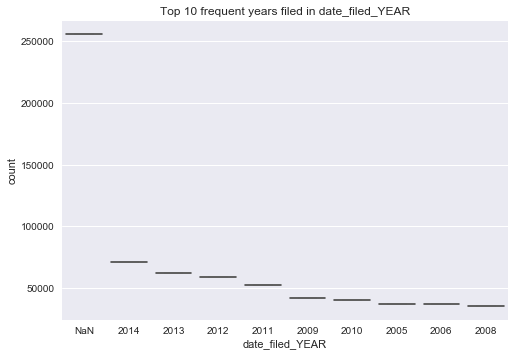

In [133]:
ax = sns.boxplot(data=df1_data_filed_year_top10,y="count",x="date_filed_YEAR",orient="v", color = "y")
plt.title('Top 10 frequent years filed in date_filed_YEAR')

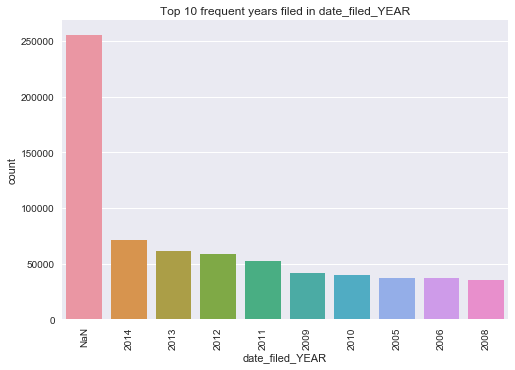

In [134]:
sns.barplot(data = df1_data_filed_year_top10, x="date_filed_YEAR",y="count")
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Top 10 frequent years filed in date_filed_YEAR')

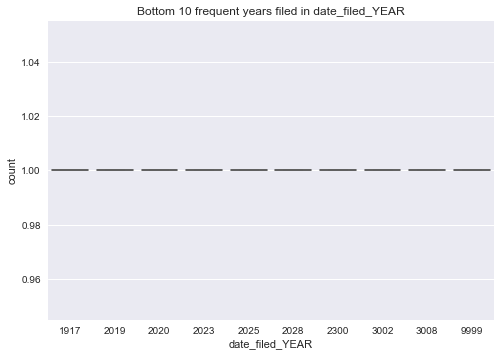

In [135]:
ax = sns.boxplot(data=df1_data_filed_year_last10,y="count",x="date_filed_YEAR",orient="v", color = "y")
plt.title('Bottom 10 frequent years filed in date_filed_YEAR')

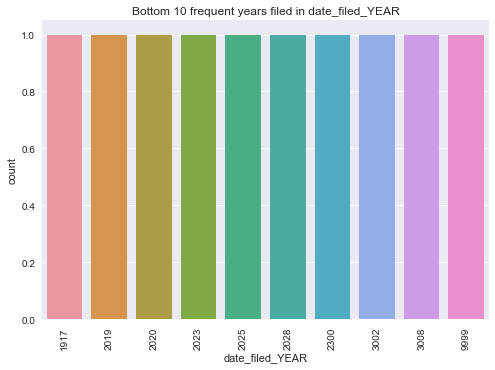

In [136]:
sns.barplot(data = df1_data_filed_year_last10, x="date_filed_YEAR",y="count")
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Bottom 10 frequent years filed in date_filed_YEAR')

In [137]:
df1.loc[ df1['date_filed_MONTH'] == 1, 'date_filed_MONTH'] = 'Jan'
df1.loc[ df1['date_filed_MONTH'] == 2, 'date_filed_MONTH'] = 'Feb'
df1.loc[ df1['date_filed_MONTH'] == 3, 'date_filed_MONTH'] = 'Mar'
df1.loc[ df1['date_filed_MONTH'] == 4, 'date_filed_MONTH'] = 'Apr'
df1.loc[ df1['date_filed_MONTH'] == 5, 'date_filed_MONTH'] = 'May'
df1.loc[ df1['date_filed_MONTH'] == 6, 'date_filed_MONTH'] = 'June'
df1.loc[ df1['date_filed_MONTH'] == 7, 'date_filed_MONTH'] = 'July'
df1.loc[ df1['date_filed_MONTH'] == 8, 'date_filed_MONTH'] = 'Aug'
df1.loc[ df1['date_filed_MONTH'] == 9, 'date_filed_MONTH'] = 'Sep'
df1.loc[ df1['date_filed_MONTH'] == 10, 'date_filed_MONTH'] = 'Oct'
df1.loc[ df1['date_filed_MONTH'] == 11, 'date_filed_MONTH'] = 'Nov'
df1.loc[ df1['date_filed_MONTH'] == 12, 'date_filed_MONTH'] = 'Dec'

# Frequent date_filed_YEAR with date_filed_month

In [138]:
strange_df = df1.loc[(df1['date_filed_YEAR'] == 2014) | 
                     (df1['date_filed_YEAR'] == 2013) | 
                     (df1['date_filed_YEAR'] == 2012) | 
                     (df1['date_filed_YEAR'] == 2011), ['date_filed_YEAR', 'date_filed_MONTH'] ]

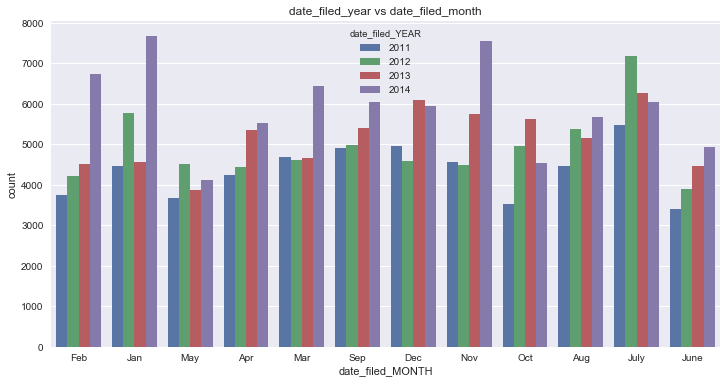

In [139]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="date_filed_MONTH",
              hue='date_filed_YEAR',
              data=strange_df).set_title('date_filed_year vs date_filed_month');

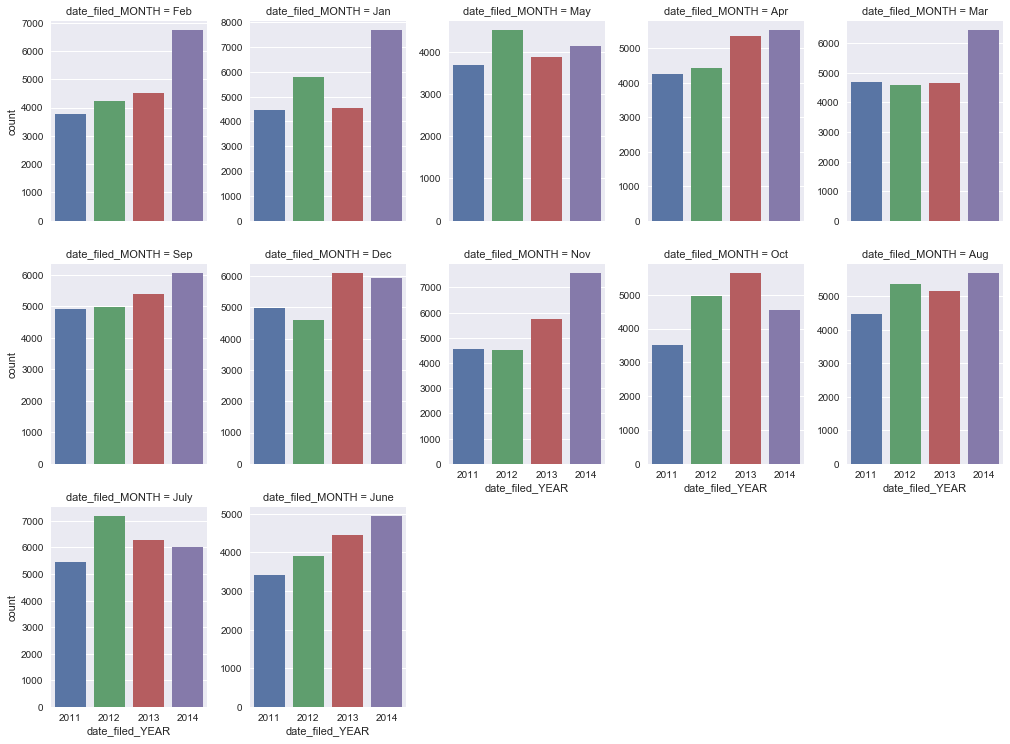

In [140]:
sns.factorplot("date_filed_YEAR", col="date_filed_MONTH", col_wrap=5,
                   data= strange_df,
                    kind="count", size=3.5, aspect=.8, sharey = False)

In [141]:
strange_df1_top_filing_year_date_filed_month = df1.loc[(df1['filing_year'] == 2014) |
                     (df1['filing_year'] == 2012) |
                     (df1['filing_year'] == 2011) |
                     (df1['filing_year'] == 2013), ['filing_year', 'date_filed_MONTH']]

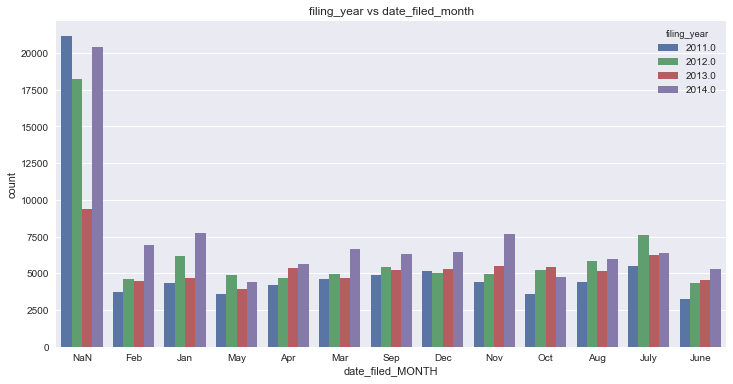

In [142]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="date_filed_MONTH",
              hue='filing_year',
              data=strange_df1_top_filing_year_date_filed_month).set_title('filing_year vs date_filed_month');

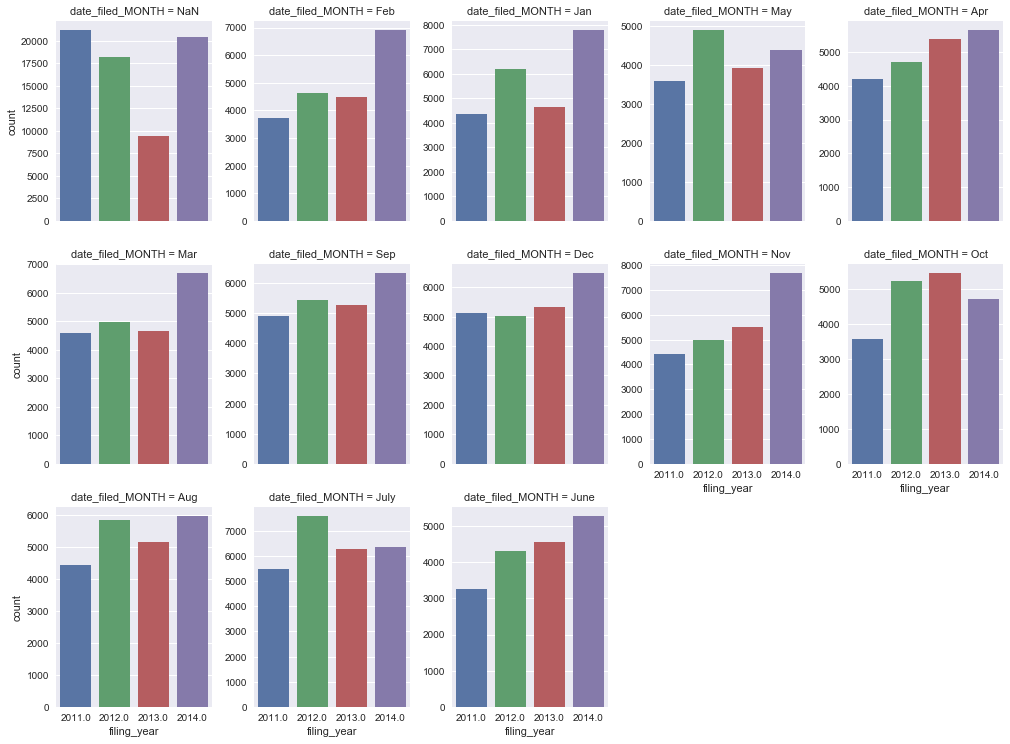

In [143]:
sns.factorplot("filing_year", col="date_filed_MONTH", col_wrap=5,
                   data= strange_df1_top_filing_year_date_filed_month,
                    kind="count", size=3.5, aspect=.8, sharey = False)

In [144]:
strange_df1_court_date_filed_month = df1.loc[ (df1['court_name'] == 'Chief Judicial Magistrate') |
                        (df1['court_name'] == 'Chief Judicial Magistrate , Jalna') |
                        (df1['court_name'] == 'ADDL. CITY CIVIL and SESSIONS JUDGES, MAYO HALL AND FTC, MAYOHAL'),
                                            ['court_name', 'date_filed_MONTH']]

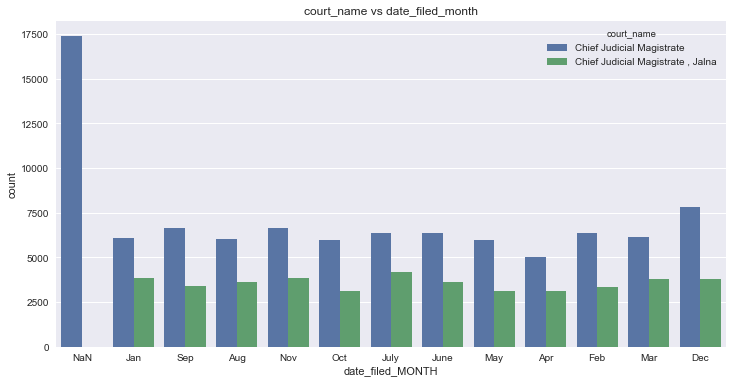

In [145]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="date_filed_MONTH",
              hue='court_name',
              data=strange_df1_court_date_filed_month).set_title('court_name vs date_filed_month');

(array([0, 1]), <a list of 2 Text xticklabel objects>)

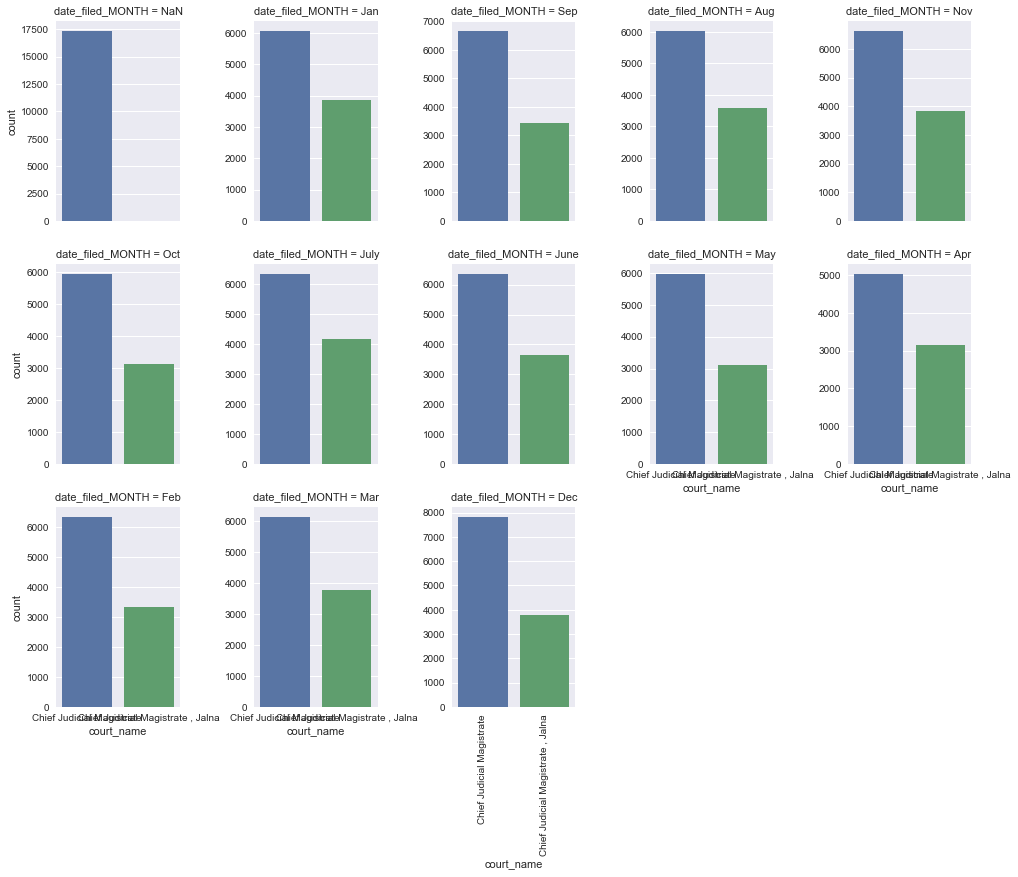

In [146]:
sns.factorplot("court_name", col="date_filed_MONTH", col_wrap=5,
                   data= strange_df1_court_date_filed_month,
                    kind="count", size=3.5, aspect=.8, sharey = False)
plt.xticks( rotation = 90 )

In [147]:
df1_decision_date_month = pd.DataFrame()
df1_decision_date_month = df1.decision_date_MONTH.value_counts().reset_index()
df1_decision_date_month.columns = ["decision_date_MONTH", "count"]
df1_decision_date_month

,decision_date_MONTH,count
0,12,102597
1,7,92624
2,3,85322
3,4,84446
4,1,75262
5,11,74060
6,10,72244
7,8,71335
8,2,70647
9,9,69966


In [148]:
monthSorted = df1_decision_date_month.sort_values(by="count",ascending=False)

In [149]:
monthSorted.loc[ monthSorted['decision_date_MONTH'] == 1, 'decision_date_MONTH'] = 'Jan'
monthSorted.loc[ monthSorted['decision_date_MONTH'] == 2, 'decision_date_MONTH'] = 'Feb'
monthSorted.loc[ monthSorted['decision_date_MONTH'] == 3, 'decision_date_MONTH'] = 'Mar'
monthSorted.loc[ monthSorted['decision_date_MONTH'] == 4, 'decision_date_MONTH'] = 'Apr'
monthSorted.loc[ monthSorted['decision_date_MONTH'] == 5, 'decision_date_MONTH'] = 'May'
monthSorted.loc[ monthSorted['decision_date_MONTH'] == 6, 'decision_date_MONTH'] = 'June'
monthSorted.loc[ monthSorted['decision_date_MONTH'] == 7, 'decision_date_MONTH'] = 'July'
monthSorted.loc[ monthSorted['decision_date_MONTH'] == 8, 'decision_date_MONTH'] = 'Aug'
monthSorted.loc[ monthSorted['decision_date_MONTH'] == 9, 'decision_date_MONTH'] = 'Sep'
monthSorted.loc[ monthSorted['decision_date_MONTH'] == 10, 'decision_date_MONTH'] = 'Oct'
monthSorted.loc[ monthSorted['decision_date_MONTH'] == 11, 'decision_date_MONTH'] = 'Nov'
monthSorted.loc[ monthSorted['decision_date_MONTH'] == 12, 'decision_date_MONTH'] = 'Dec'

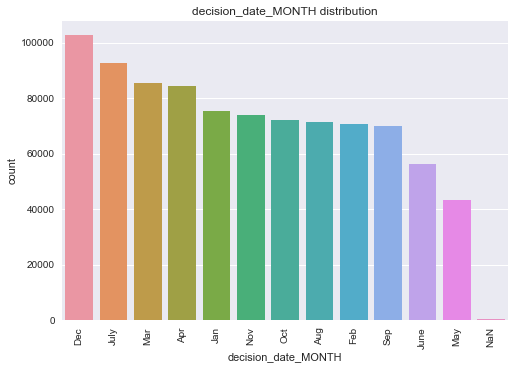

In [150]:
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December",
            "none"]
sns.barplot(data = monthSorted, x="decision_date_MONTH",y="count")
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('decision_date_MONTH distribution')

In [151]:
df1_decision_date_year = pd.DataFrame()
df1_decision_date_year = df1.decision_date_YEAR.value_counts().reset_index()
df1_decision_date_year.columns = ["decision_date_YEAR", "count"]
df1_decision_date_year_top10 = df1_decision_date_year.head(10)
df1_decision_date_year_last10 = df1_decision_date_year.tail(10)
df1_decision_date_year

,decision_date_YEAR,count
0,2014,133919
1,2013,115495
2,2012,97231
3,2015,85302
4,2011,65764
5,2008,64329
6,2010,55683
7,2016,53571
8,2009,52741
9,2007,47784


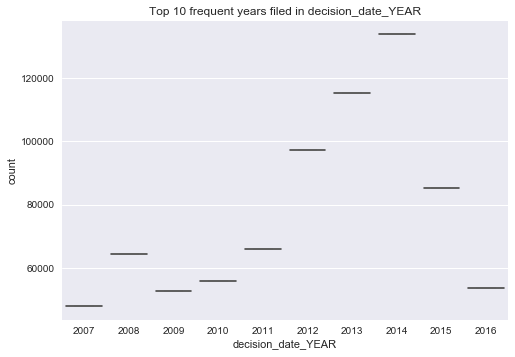

In [152]:
ax = sns.boxplot(data=df1_decision_date_year_top10,y="count",x="decision_date_YEAR",orient="v", color = "y")
plt.title('Top 10 frequent years filed in decision_date_YEAR')

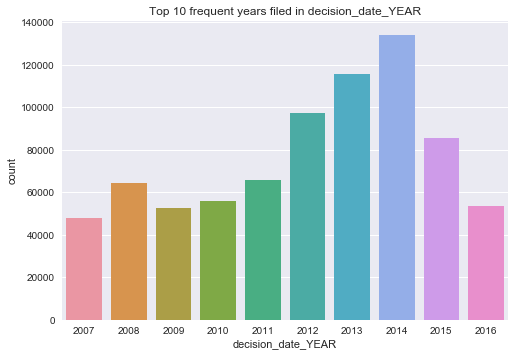

In [153]:
sns.barplot(data = df1_decision_date_year_top10, x="decision_date_YEAR",y="count")
plt.ylabel('count')
plt.title('Top 10 frequent years filed in decision_date_YEAR')

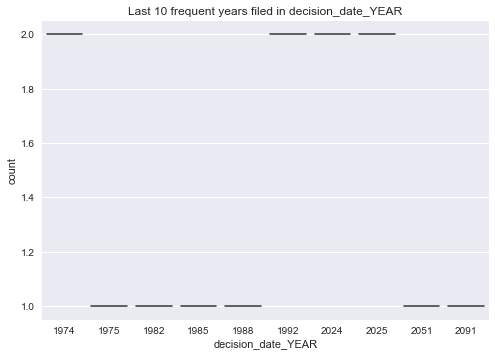

In [154]:
ax = sns.boxplot(data=df1_decision_date_year_last10,y="count",x="decision_date_YEAR",orient="v", color = "y")
plt.title('Last 10 frequent years filed in decision_date_YEAR')

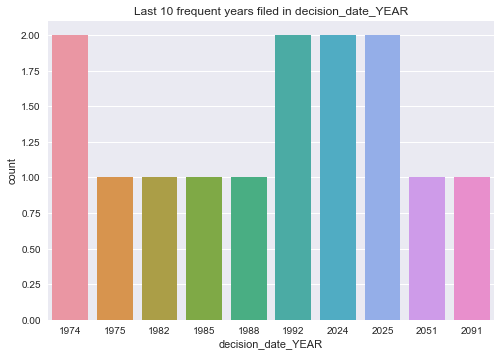

In [155]:
sns.barplot(data = df1_decision_date_year_last10, x="decision_date_YEAR",y="count")
plt.ylabel('count')
plt.title('Last 10 frequent years filed in decision_date_YEAR')

In [156]:
df1.loc[ df1['decision_date_MONTH'] == 1, 'decision_date_MONTH'] = 'Jan'
df1.loc[ df1['decision_date_MONTH'] == 2, 'decision_date_MONTH'] = 'Feb'
df1.loc[ df1['decision_date_MONTH'] == 3, 'decision_date_MONTH'] = 'Mar'
df1.loc[ df1['decision_date_MONTH'] == 4, 'decision_date_MONTH'] = 'Apr'
df1.loc[ df1['decision_date_MONTH'] == 5, 'decision_date_MONTH'] = 'May'
df1.loc[ df1['decision_date_MONTH'] == 6, 'decision_date_MONTH'] = 'June'
df1.loc[ df1['decision_date_MONTH'] == 7, 'decision_date_MONTH'] = 'July'
df1.loc[ df1['decision_date_MONTH'] == 8, 'decision_date_MONTH'] = 'Aug'
df1.loc[ df1['decision_date_MONTH'] == 9, 'decision_date_MONTH'] = 'Sep'
df1.loc[ df1['decision_date_MONTH'] == 10, 'decision_date_MONTH'] = 'Oct'
df1.loc[ df1['decision_date_MONTH'] == 11, 'decision_date_MONTH'] = 'Nov'
df1.loc[ df1['decision_date_MONTH'] == 12, 'decision_date_MONTH'] = 'Dec'

In [157]:
df1_decision_date_year_top10_decision_date_month = df1.loc[ (df1.decision_date_YEAR == 2014) |
                                                            (df1.decision_date_YEAR == 2013) |
                                                            (df1.decision_date_YEAR == 2012) |
                                                            (df1.decision_date_YEAR == 2015),
                                                           ['decision_date_YEAR', 'decision_date_MONTH'] ]

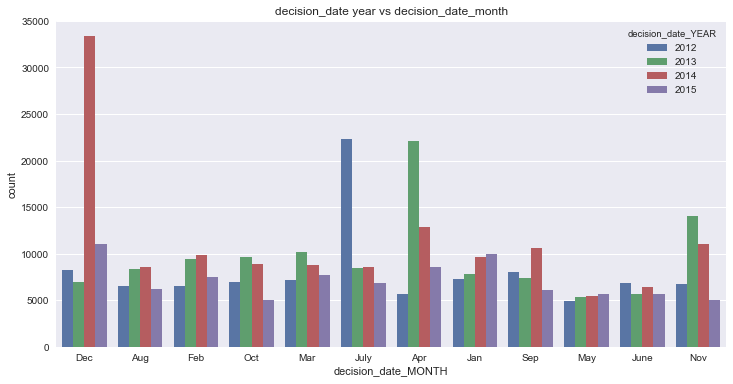

In [158]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="decision_date_MONTH",
              hue='decision_date_YEAR',
              data=df1_decision_date_year_top10_decision_date_month).set_title('decision_date year vs decision_date_month');

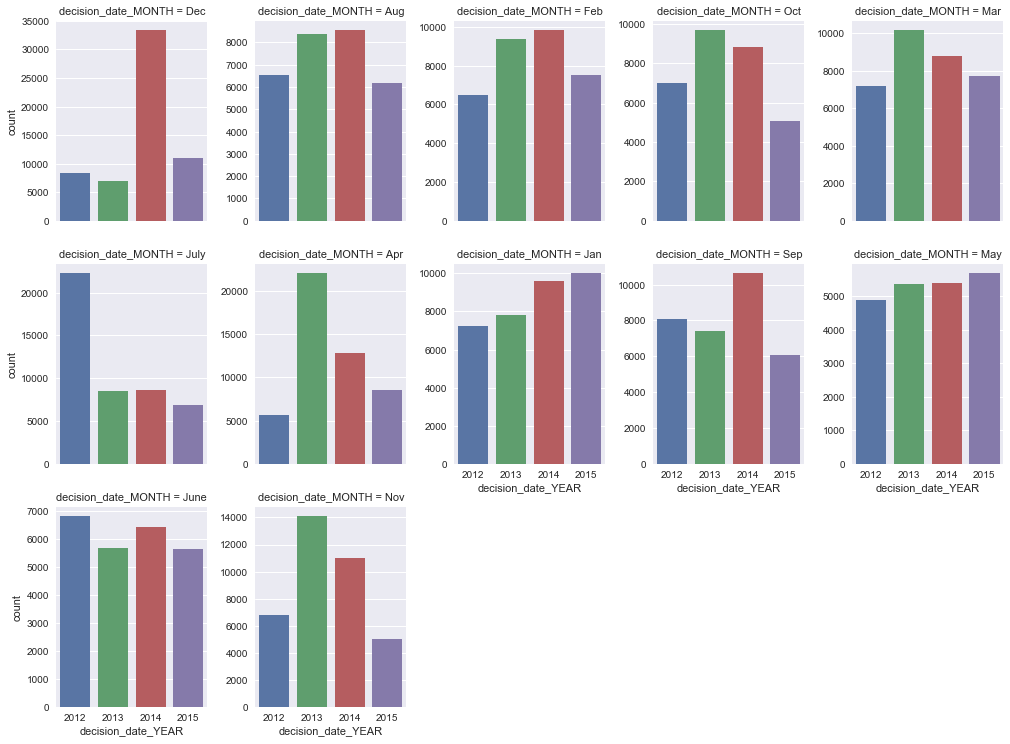

In [159]:
sns.factorplot("decision_date_YEAR", col="decision_date_MONTH", col_wrap=5,
                   data = df1_decision_date_year_top10_decision_date_month,
                    kind="count", size=3.5, aspect=.8, sharey = False)

In [160]:
df1_filing_year_top4_decision_date_month = df1.loc[ (df1.filing_year == 2014) |
                                                     (df1.filing_year == 2013) |
                                                     (df1.filing_year == 2012) |
                                                     (df1.filing_year == 2011),
                                                ['filing_year', 'decision_date_MONTH'] ]

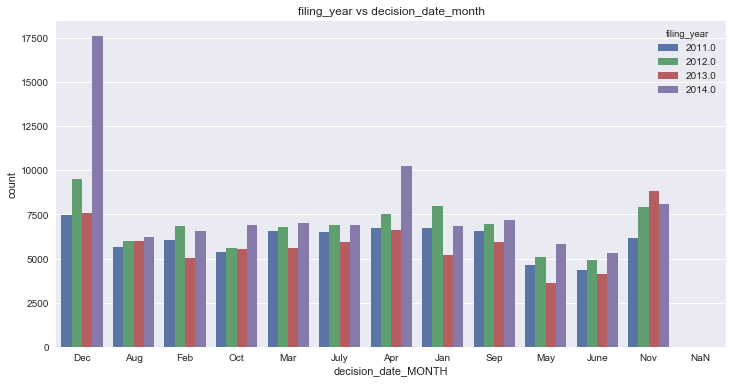

In [161]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="decision_date_MONTH",
              hue='filing_year',
              data=df1_filing_year_top4_decision_date_month).set_title('filing_year vs decision_date_month');

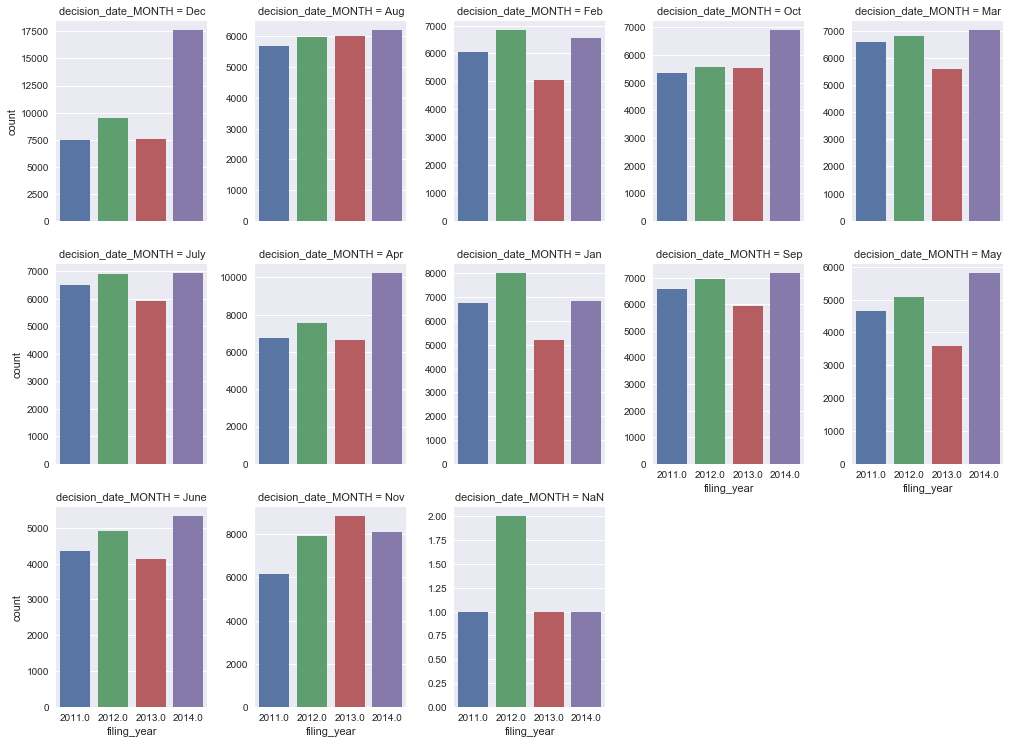

In [162]:
sns.factorplot("filing_year", col="decision_date_MONTH", col_wrap=5,
                   data = df1_filing_year_top4_decision_date_month,
                    kind="count", size=3.5, aspect=.8, sharey = False)

In [163]:
df1_court_name_top3_decision_date_month = df1.loc[(df1['court_name'] == 'Chief Judicial Magistrate') |
                                                 (df1['court_name'] == 'Chief Judicial Magistrate , Jalna') |
                                                 (df1['court_name'] == 'ADDL. CITY CIVIL and SESSIONS JUDGES, MAYO HALL AND FTC, MAYOHALL'),
                                                ['court_name', 'decision_date_MONTH']]

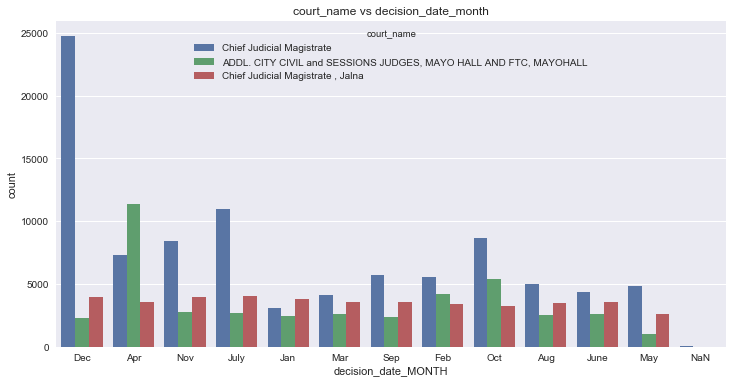

In [164]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="decision_date_MONTH",
              hue='court_name',
              data=df1_court_name_top3_decision_date_month).set_title('court_name vs decision_date_month');

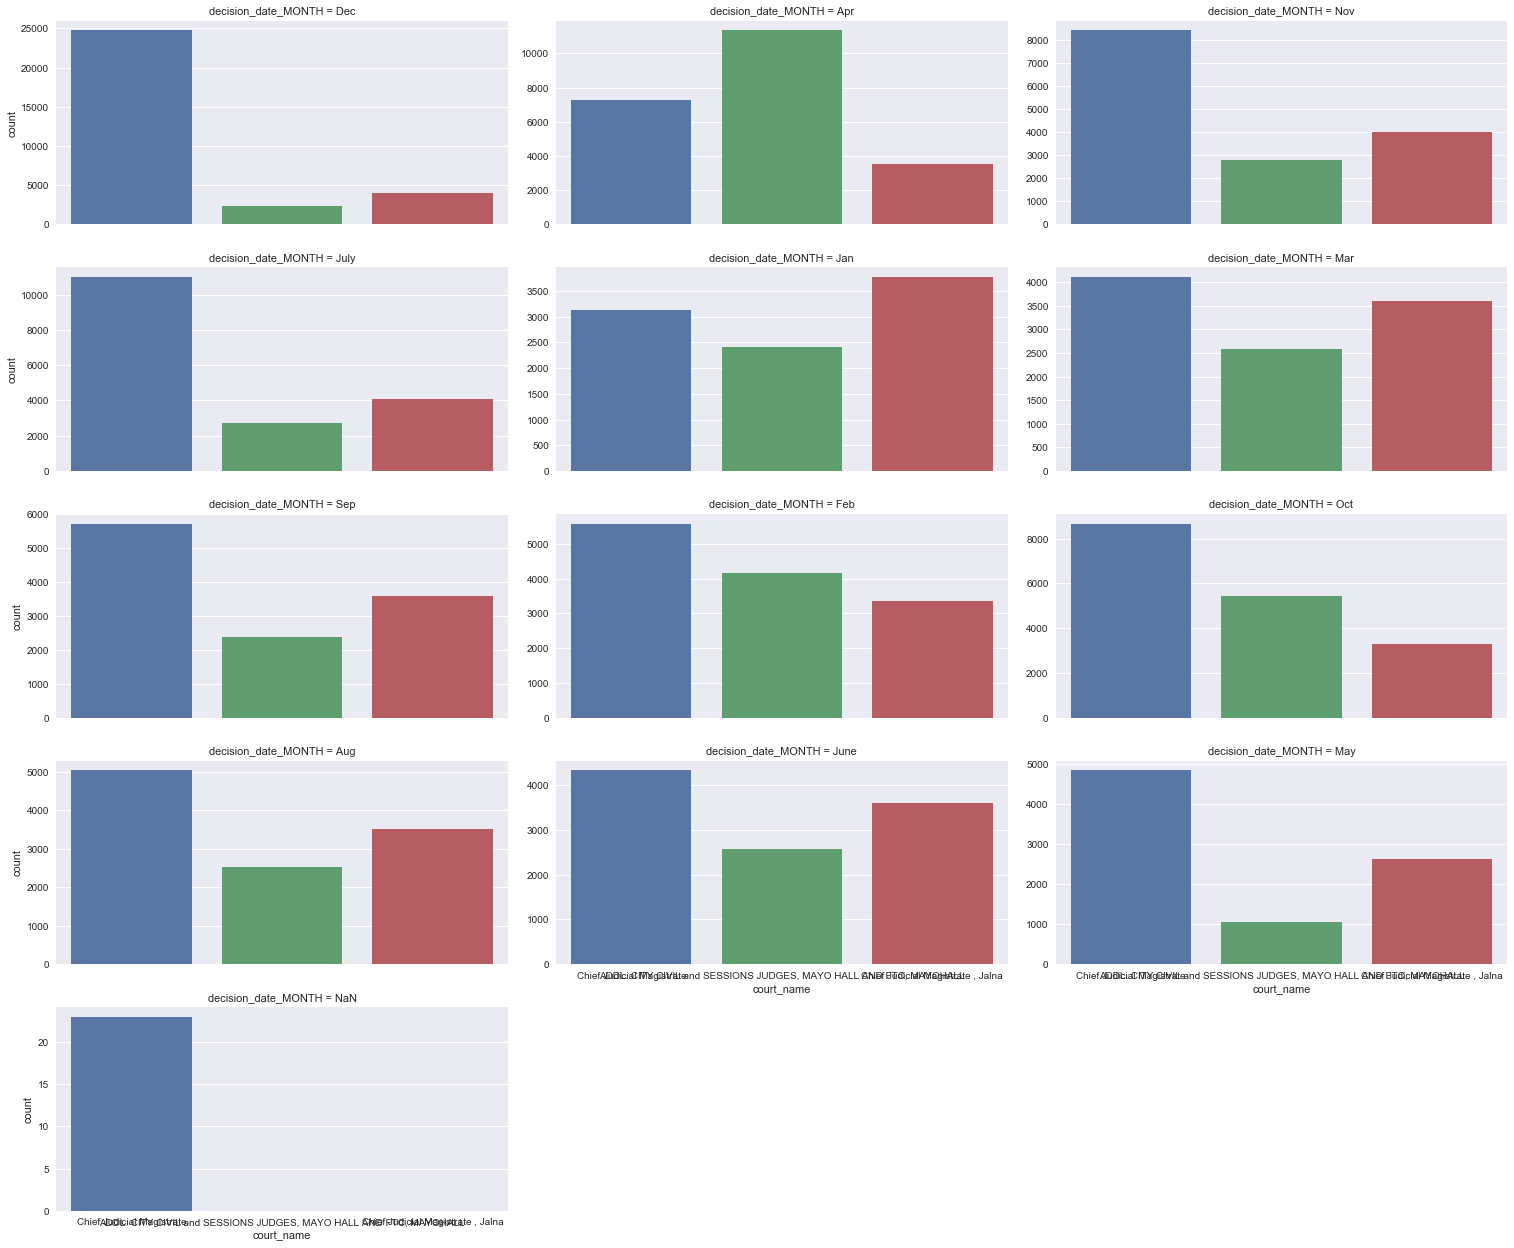

In [165]:
sns.factorplot("court_name", col="decision_date_MONTH", col_wrap=3,
                   data = df1_court_name_top3_decision_date_month,
                    kind="count", size=3.5, aspect= 2, sharey = False)

In [166]:
df1_date_filed_YEAR_top4_decision_date_MONTH = df1.loc[ (df1.date_filed_YEAR == 2014) |
                                                       (df1.date_filed_YEAR == 2013) |
                                                       (df1.date_filed_YEAR == 2012) |
                                                       (df1.date_filed_YEAR == 2011),
                                                       ['date_filed_YEAR', 'decision_date_MONTH']]

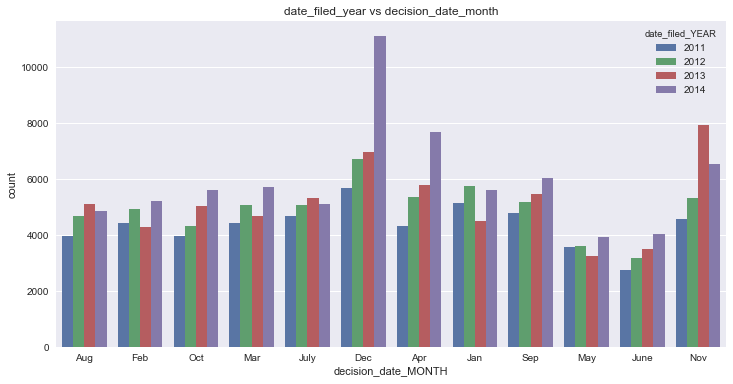

In [167]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="decision_date_MONTH",
              hue='date_filed_YEAR',
              data=df1_date_filed_YEAR_top4_decision_date_MONTH).set_title('date_filed_year vs decision_date_month');

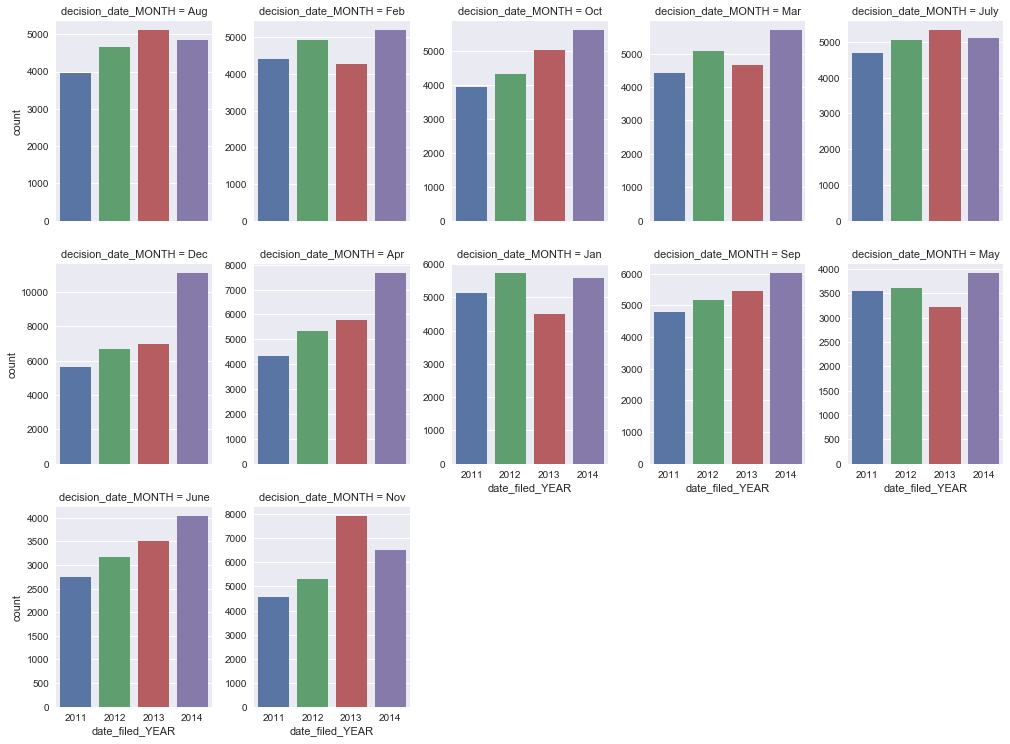

In [168]:
sns.factorplot("date_filed_YEAR", col="decision_date_MONTH", col_wrap=5,
                   data = df1_date_filed_YEAR_top4_decision_date_MONTH,
                    kind="count", size=3.5, aspect=.8, sharey = False)

In [169]:
df1_decision_date_year_date_filed_MONTH = df1.loc[ (df1.decision_date_YEAR == 2014) |
                                                   (df1.decision_date_YEAR == 2013) |
                                                   (df1.decision_date_YEAR == 2012) |
                                                   (df1.decision_date_YEAR == 2015),
                                                 ['decision_date_YEAR', 'date_filed_MONTH']]

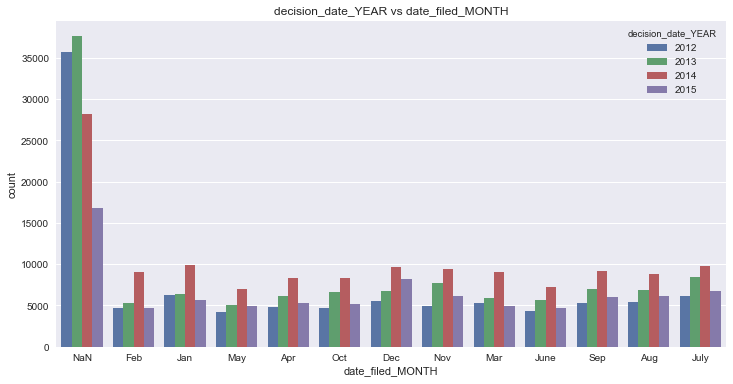

In [170]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="date_filed_MONTH",
              hue='decision_date_YEAR',
              data=df1_decision_date_year_date_filed_MONTH).set_title('decision_date_YEAR vs date_filed_MONTH');

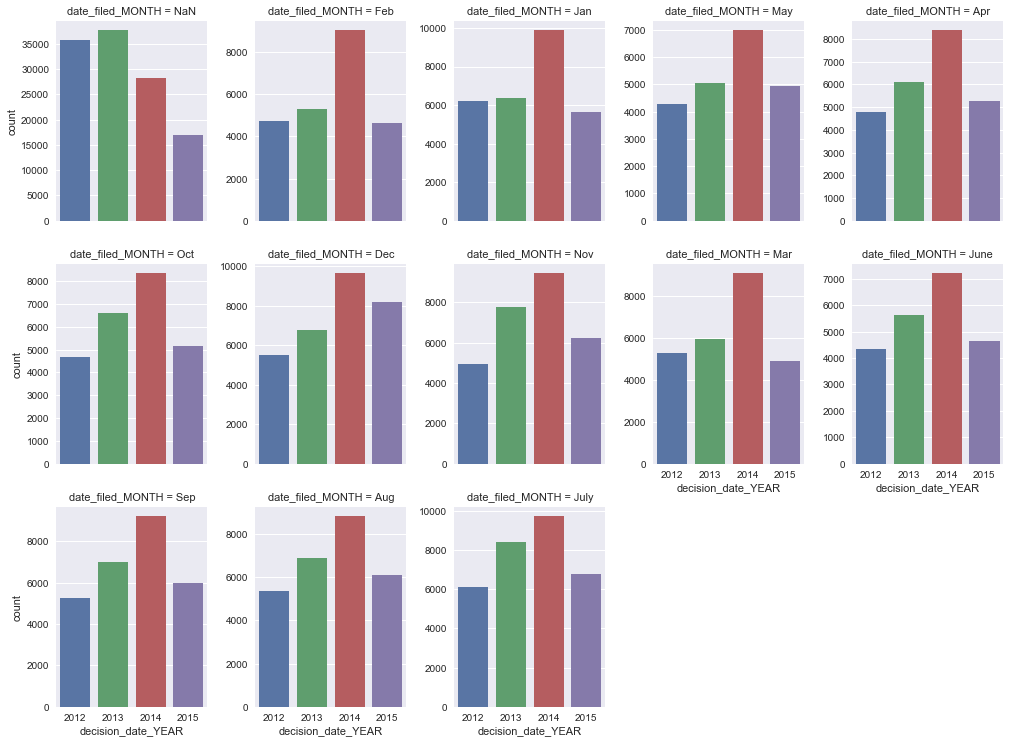

In [171]:
sns.factorplot("decision_date_YEAR", col="date_filed_MONTH", col_wrap=5,
                   data = df1_decision_date_year_date_filed_MONTH,
                    kind="count", size=3.5, aspect=.8, sharey = False)

In [172]:
df1.dtypes

combined_case_number         object
filing_year                 float64
court_name                   object
before_honourable_judges     object
current_status               object
nature_of_disposal           object
date_filed_MONTH             object
date_filed_YEAR              object
decision_date_MONTH          object
decision_date_YEAR           object
dtype: object

In [173]:
df1.current_status.value_counts()

Disposed    898236
Name: current_status, dtype: int64

# Only one unique value in current_status, so drop current_status

In [174]:
df1 = df1.drop('current_status', axis = 1)

In [175]:
df1.nature_of_disposal.value_counts()

#NAME?                                                        62144
Contested--JUDGMENT                                           59159
Uncontested--OTHERWISE                                        52503
Contested--OTHERWISE                                          51247
Contested--ACQUITTED                                          39910
Contested--DISMISSED                                          38951
--OTHERWISE                                                   33250
Contested--ALLOWED                                            31476
Uncontested--DISMISSED                                        27970
Contested--DISPOSED                                           27876
Contested--TRANSFER                                           27297
--                                                            26760
Uncontested--CONVICTED                                        20737
Uncontested--TRANSFER                                         17783
Contested--DECIDED                              

In [176]:
def brake(x):
    txt = str(x)
    y = txt.split('--')
    if len(y) != 2:
        return 'none'
    return y[0]

In [177]:
def brake1(x):
    txt = str(x)
    y = txt.split('--')
    if len(y) != 2:
        return 'none'
    return y[1]

In [178]:
df1['target'] = df1['nature_of_disposal'].map(lambda x: brake(x))

In [179]:
df1['not_target'] = df1['nature_of_disposal'].map(lambda x: brake1(x))

In [180]:
df1.target.value_counts()

Contested      459781
Uncontested    271661
               103677
none            63117
Name: target, dtype: int64

In [181]:
df1.not_target.value_counts()

OTHERWISE                                          137000
DISMISSED                                           71579
JUDGMENT                                            65908
none                                                63117
ACQUITTED                                           48487
TRANSFER                                            45080
ALLOWED                                             43937
DISPOSED                                            35515
CONVICTED                                           34215
CLOSED                                              28693
                                                    27532
COMPROMISED                                         27383
DECIDED                                             18899
DISMISSED IN DEFAULT                                17927
LOKADALAT                                           14936
PARTLY ALLOWED                                      12617
Decided                                              9762
SETTLED IN LOK

In [182]:
len(df1.not_target.value_counts())

478

In [184]:
df1.filing_year = df1.filing_year.astype('object')

# Every data type is object

In [185]:
df1.dtypes

combined_case_number        object
filing_year                 object
court_name                  object
before_honourable_judges    object
nature_of_disposal          object
date_filed_MONTH            object
date_filed_YEAR             object
decision_date_MONTH         object
decision_date_YEAR          object
target                      object
not_target                  object
dtype: object

In [186]:
df1.target.value_counts()

Contested      459781
Uncontested    271661
               103677
none            63117
Name: target, dtype: int64

In [187]:
df1 = df1.loc[ (df1.target == 'Contested') |
               (df1.target == 'Uncontested')]

In [188]:
df1.target.value_counts()

Contested      459781
Uncontested    271661
Name: target, dtype: int64

# nature_of_disposal has been scattered into target and non_target columns, do drop it

In [189]:
df1 = df1.drop('nature_of_disposal', axis = 1)

In [190]:
 df1.shape

(731442, 10)

# Since the data is huge, so I am just dropping the missing rows for each column, I can fill them with appropriate value but I opted to reduce the no of rows so that model training takes less time

In [191]:
df1 =  df1.loc[(df1.date_filed_YEAR != 'NaN')]
df1 = df1.loc[(df1.decision_date_YEAR != 'NaN')]

In [192]:
df1.decision_date_YEAR = df1.decision_date_YEAR.astype(int)
df1.date_filed_YEAR = df1.date_filed_YEAR.astype(int)

# Creating a new feature

In [193]:
df1['gap_bet_decision_date_date_filed'] = df1['decision_date_YEAR'] - df1['date_filed_YEAR']

In [194]:
df1.decision_date_YEAR = df1.decision_date_YEAR.astype(object)
df1.date_filed_YEAR = df1.date_filed_YEAR.astype(object)

In [195]:
df1.shape

(553621, 11)

In [196]:
df1.loc[ df1['decision_date_MONTH'] == 1, 'decision_date_MONTH'] = 'Jan'
df1.loc[ df1['decision_date_MONTH'] == 2, 'decision_date_MONTH'] = 'Feb'
df1.loc[ df1['decision_date_MONTH'] == 3, 'decision_date_MONTH'] = 'Mar'
df1.loc[ df1['decision_date_MONTH'] == 4, 'decision_date_MONTH'] = 'Apr'
df1.loc[ df1['decision_date_MONTH'] == 5, 'decision_date_MONTH'] = 'May'
df1.loc[ df1['decision_date_MONTH'] == 6, 'decision_date_MONTH'] = 'June'
df1.loc[ df1['decision_date_MONTH'] == 7, 'decision_date_MONTH'] = 'July'
df1.loc[ df1['decision_date_MONTH'] == 8, 'decision_date_MONTH'] = 'Aug'
df1.loc[ df1['decision_date_MONTH'] == 9, 'decision_date_MONTH'] = 'Sep'
df1.loc[ df1['decision_date_MONTH'] == 10, 'decision_date_MONTH'] = 'Oct'
df1.loc[ df1['decision_date_MONTH'] == 11, 'decision_date_MONTH'] = 'Nov'
df1.loc[ df1['decision_date_MONTH'] == 12, 'decision_date_MONTH'] = 'Dec'

In [197]:
df1.head()

,combined_case_number,filing_year,court_name,before_honourable_judges,date_filed_MONTH,date_filed_YEAR,decision_date_MONTH,decision_date_YEAR,target,not_target,gap_bet_decision_date_date_filed
9,NOTICE OF MOTION-100381-2012,2012,"City Civil Court, Mumbai",JUDGE 10 ADDL SESSIONS JUDGE,Feb,2012,Aug,2012,Contested,OTHERWISE,0
17,NOTICE OF MOTION-100380-2012,2012,"City Civil Court, Mumbai",JUDGE 1 ADDL SESSIONS JUDGE,Feb,2012,Feb,2012,Uncontested,OTHERWISE,0
32,NOTICE OF MOTION-100378-2012,2012,"City Civil Court, Mumbai",JUDGE 12 ADDL SESSIONS JUDGE,Feb,2012,Oct,2013,Contested,ALLOWED,1
33,NOTICE OF MOTION-100377-2012,2012,"City Civil Court, Mumbai",JUDGE 10 ADDL SESSIONS JUDGE,Feb,2012,Feb,2012,Contested,OTHERWISE,0
82,NOTICE OF MOTION-100376-2012,2012,"City Civil Court, Mumbai",JUDGE 12 ADDL SESSIONS JUDGE,Feb,2012,Feb,2012,Contested,DISMISSED,0


In [198]:
df1.dtypes

combined_case_number                object
filing_year                         object
court_name                          object
before_honourable_judges            object
date_filed_MONTH                    object
date_filed_YEAR                     object
decision_date_MONTH                 object
decision_date_YEAR                  object
target                              object
not_target                          object
gap_bet_decision_date_date_filed     int32
dtype: object

# Dropping the missing value rows

In [199]:
df1['before_honourable_judges'].fillna('kane', inplace=True)
df1['filing_year'].fillna('10000', inplace = True)

In [200]:
df1 =  df1.loc[(df1.before_honourable_judges != 'kane')]
df1 = df1.loc[(df1.filing_year != '10000')]

In [201]:
df1.shape

(375714, 11)

In [202]:
df1.isnull().sum(axis = 0)

combined_case_number                0
filing_year                         0
court_name                          0
before_honourable_judges            0
date_filed_MONTH                    0
date_filed_YEAR                     0
decision_date_MONTH                 0
decision_date_YEAR                  0
target                              0
not_target                          0
gap_bet_decision_date_date_filed    0
dtype: int64

In [203]:
train = df1.copy()

In [204]:
train.target.value_counts()

Contested      231585
Uncontested    144129
Name: target, dtype: int64

# I am trying to see this dataset as a supervised learning problem with target column as target variable.   Likepredicting whether the case is contested or uncontested

In [205]:
train['target'] = train['target'].replace( to_replace = {'Contested': 0, 'Uncontested': 1})

In [206]:
target_ = train['target']

In [207]:
train = train.drop('target', axis = 1)

In [208]:
from sklearn.preprocessing import LabelEncoder

for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values))
        train[c] = lbl.transform(list(train[c].values))

In [209]:
train.dtypes

combined_case_number                int64
filing_year                         int64
court_name                          int64
before_honourable_judges            int64
date_filed_MONTH                    int64
date_filed_YEAR                     int64
decision_date_MONTH                 int64
decision_date_YEAR                  int64
not_target                          int64
gap_bet_decision_date_date_filed    int32
dtype: object

In [210]:
target_.dtypes

dtype('int64')

In [211]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target_, test_size = 0.2, random_state = 0)

In [212]:
len(y_train)

300571

In [213]:
### Running Xgboost
def runXGB(train_X, train_y, test_X, test_y, seed_val=0, rounds=500, dep=8, eta=0.05,sub_sample=0.7,col_sample=0.7,
           min_child_weight_val=1, silent_val = 1):
    params = {}
    params["objective"] = "binary:logistic"
    params['eval_metric'] = 'auc'
    params["eta"] = eta
    params["subsample"] = sub_sample
    params["min_child_weight"] = min_child_weight_val
    params["colsample_bytree"] = col_sample
    params["max_depth"] = dep
    params["silent"] = silent_val
    params["seed"] = seed_val
    #params["max_delta_step"] = 2
    #params["gamma"] = 0.5
    num_rounds = rounds

    plst = list(params.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    xgtest = xgb.DMatrix(test_X, label=test_y)
    watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
    model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=100, verbose_eval=20)
    pred_test_y = model.predict(xgtest, ntree_limit=model.best_ntree_limit)
    loss = 0
    loss = metrics.roc_auc_score(test_y, pred_test_y)
    return pred_test_y, loss, model

In [214]:
pred_test_xg1, loss_xg, model_xg = runXGB(X_train, y_train, X_test, y_test)

[0]	train-auc:0.818568	test-auc:0.815515
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 100 rounds.
[20]	train-auc:0.926473	test-auc:0.924309
[40]	train-auc:0.932898	test-auc:0.9306
[60]	train-auc:0.937745	test-auc:0.935219
[80]	train-auc:0.943061	test-auc:0.940303
[100]	train-auc:0.946693	test-auc:0.943701
[120]	train-auc:0.950679	test-auc:0.947356
[140]	train-auc:0.954662	test-auc:0.951125
[160]	train-auc:0.957543	test-auc:0.953786
[180]	train-auc:0.95973	test-auc:0.955816
[200]	train-auc:0.9619	test-auc:0.957774
[220]	train-auc:0.963527	test-auc:0.95917
[240]	train-auc:0.965205	test-auc:0.960639
[260]	train-auc:0.966574	test-auc:0.961761
[280]	train-auc:0.967695	test-auc:0.962678
[300]	train-auc:0.968709	test-auc:0.963488
[320]	train-auc:0.969552	test-auc:0.964167
[340]	train-auc:0.970339	test-auc:0.964774
[360]	train-auc:0.971073	test-auc:0.965296
[380]	train-auc:0.971827	test-auc:0.965905
[400]	trai

In [215]:
loss_xg

0.96873129770650213

In [735]:
### Running Xgboost classifier for model explaination
def runXGBC(train_X, train_y, test_X, test_y, seed_val=0, rounds=500, dep=8, eta=0.05,sub_sample=0.7,col_sample=0.7,
           min_child_weight_val=1, silent_val = 1):
    model = xgb.XGBClassifier(objective="binary:logistic",
                              learning_rate=eta,
                              subsample=sub_sample,
                              #min_child_weight=child_weight,
                              colsample_bytree=col_sample,
                              max_depth=dep,
                              silent=silent_val,
                              seed=seed_val,
                              n_estimators=rounds)

    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:,1]
    test_preds = model.predict_proba(test_X)[:,1]
    train_loss = metrics.roc_auc_score(train_y, train_preds)
    test_loss = metrics.roc_auc_score(test_y, test_preds)
    print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, model

In [736]:
pred_test_xg1c, loss_xgc, model_xgc = runXGBC(X_train, y_train, X_test, y_test)

Train and Test loss :  0.975487103809 0.968731297707


In [716]:
### Running LightGBM
def runLGB(train_X, train_y, test_X, test_y, feature_names=None, seed_val=0, rounds=500, dep=8, eta=0.05,sub_sample=0.7,col_sample=0.7,
          silent_val = 1,min_data_in_leaf_val = 20, bagging_freq = 5):
    params = {}
    params["objective"] = "binary"
    params['metric'] = 'auc'
    params["max_depth"] = dep
    params["min_data_in_leaf"] = min_data_in_leaf_val
    params["learning_rate"] = eta
    params["bagging_fraction"] = sub_sample
    params["feature_fraction"] = col_sample
    params["bagging_freq"] = bagging_freq
    params["bagging_seed"] = seed_val
    params["verbosity"] = silent_val
    num_rounds = rounds
    
    lgtrain = lgb.Dataset(train_X, label=train_y)

    lgtest = lgb.Dataset(test_X, label=test_y)
    model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgtest], early_stopping_rounds=100, verbose_eval=20) 
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    loss = 0
    loss = metrics.roc_auc_score(test_y, pred_test_y)
    print(loss)
    return pred_test_y, loss, model

In [717]:
pred_test_lg1, loss_lg, model_lg = runLGB(X_train, y_train, X_test, y_test)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.887057
[40]	valid_0's auc: 0.900845
[60]	valid_0's auc: 0.908811
[80]	valid_0's auc: 0.914902
[100]	valid_0's auc: 0.92067
[120]	valid_0's auc: 0.924398
[140]	valid_0's auc: 0.928301
[160]	valid_0's auc: 0.931429
[180]	valid_0's auc: 0.934003
[200]	valid_0's auc: 0.936548
[220]	valid_0's auc: 0.938511
[240]	valid_0's auc: 0.940431
[260]	valid_0's auc: 0.942031
[280]	valid_0's auc: 0.94345
[300]	valid_0's auc: 0.944589
[320]	valid_0's auc: 0.945999
[340]	valid_0's auc: 0.947118
[360]	valid_0's auc: 0.948157
[380]	valid_0's auc: 0.948991
[400]	valid_0's auc: 0.95009
[420]	valid_0's auc: 0.950937
[440]	valid_0's auc: 0.95183
[460]	valid_0's auc: 0.952535
[480]	valid_0's auc: 0.95315
[500]	valid_0's auc: 0.953786
Did not meet early stopping. Best iteration is:
[500]	valid_0's auc: 0.953786
0.953786330936


In [217]:
### Running Extra Trees  
def runET(train_X, train_y, test_X, test_y, depth=20, leaf=10, feat=0.2):
    model=ExtraTreesClassifier(n_estimators = 100, max_depth = depth, min_samples_split = 2, min_samples_leaf = leaf, max_features =  feat, n_jobs = 8, random_state = 0)
    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:,1]
    test_preds = model.predict_proba(test_X)[:,1]
    test_loss = 0
    train_loss = metrics.roc_auc_score(train_y, train_preds)
    test_loss = metrics.roc_auc_score(test_y, test_preds)
    print("Depth, leaf, feat : ", depth, leaf, feat)
    print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, model

In [218]:
pred_test_lg1, loss_lg, model_lg = runET(X_train, y_train, X_test, y_test)

Depth, leaf, feat :  20 10 0.2
Train and Test loss :  0.95503297204 0.943633769968


In [219]:
### Running Random Forest
def runRF(train_X, train_y, test_X, test_y, depth=20, leaf=10, feat=0.2):
    model = RandomForestClassifier(
            n_estimators = 1000,
                    max_depth = depth,
                    min_samples_split = 2,
                    min_samples_leaf = leaf,
                    max_features =  feat,
                    n_jobs = 4,
                    random_state = 0)
    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:,1]
    test_preds = model.predict_proba(test_X)[:,1]

    
    test_loss = 0
    
    train_loss = metrics.roc_auc_score(train_y, train_preds)
    test_loss = metrics.roc_auc_score(test_y, test_preds)
    print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, model


In [220]:
test_pred_rf, loss_rf, model_rf = runRF(X_train, y_train, X_test, y_test)

Train and Test loss :  0.977521399873 0.966651541694


# Boom! xgboost won with the highest auc score. 
# But this is not the end

# We can hypertune the parameters for each of the models and get the exact value for each of the parameters of the model and ultimately the model performance can increase or design a stacked model of these different algorithms. But due to shortage of time, I just design some models on the dat to predict whether the case is filed or unfiled.

# The exploration of the data can be even more , I try to explore how much I can. But it was total fun. Thanks for giving me this chance to analyze this dataset.